<a href="https://colab.research.google.com/github/paweltaranov/Pawel_Taranov_Zadanie_01/blob/main/Taranov_Pavel_IBRD_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![19002-centr_invest[1].jpg](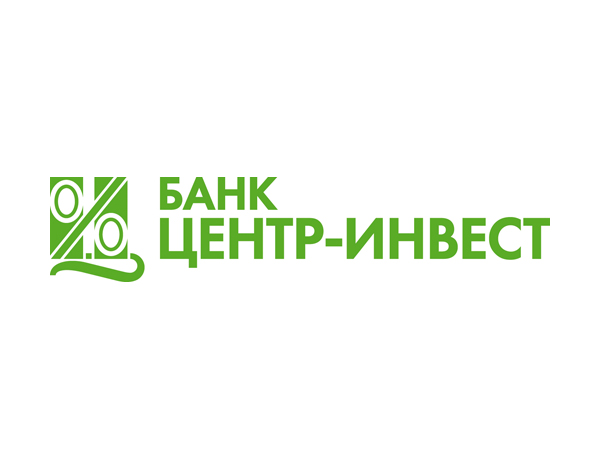)

# **Исследовательский анализ данных на примере набора данных "IBRD Statement Of Loans Historical Historical Data"**

Выполнил: Таранов Павел

e-mail: taranov@inbox.ru

+79281182170

[Telegram: https://t.me/PMihalych](https://t.me/PMihalych)

[Резюме](https://rostov.hh.ru/resume/c10fde67ff0c15fa970039ed1f6d4833743953)

[Портфолио](https://gitlab.com/paweltaranov/portfolio)





# Задача 1. Исследовательский анализ данных

## 1.Получение данных

In [427]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'})

In [428]:
!gdown 1yYpFNisZbz4d3gVLH6VE_QvSuuq2bdIj
df = pd.read_csv('/content/IBRD_Statement_Of_Loans_-_Historical_Data.csv')

Downloading...
From: https://drive.google.com/uc?id=1yYpFNisZbz4d3gVLH6VE_QvSuuq2bdIj
To: /content/IBRD_Statement_Of_Loans_-_Historical_Data.csv
100% 465M/465M [00:04<00:00, 98.2MB/s]


<ipython-input-428-490a90ca42b1>:2: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/IBRD_Statement_Of_Loans_-_Historical_Data.csv')


## 2.Предварительная обработка данных

### Обзор и анализ пропусков

In [429]:
df.head(3)

End of Period Loan Number                   Region Country Code  \
0  05/31/2022 12:00:00 AM   IBRD00010  EUROPE AND CENTRAL ASIA           FR   
1  05/31/2022 12:00:00 AM   IBRD00020  EUROPE AND CENTRAL ASIA           NL   
2  05/31/2022 12:00:00 AM   IBRD00021  EUROPE AND CENTRAL ASIA           NL   

       Country         Borrower Guarantor Country Code Guarantor Loan Type  \
0       France  CREDIT NATIONAL                     FR    France       NPL   
1  Netherlands              NaN                    NaN       NaN       NPL   
2  Netherlands              NaN                    NaN       NaN       NPL   

    Loan Status  ...  Repaid 3rd Party  Due 3rd Party Loans Held  \
0  Fully Repaid  ...      2.499620e+08            0.0        0.0   
1  Fully Repaid  ...      8.767200e+07            0.0        0.0   
2  Fully Repaid  ...      3.955788e+06            0.0        0.0   

     First Repayment Date     Last Repayment Date  Agreement Signing Date  \
0  11/01/1952 12:00:00 AM  05/01/1977 12:00:00 AM  05/09/1947 12:00:00 AM   
1  04/01/1952 12:00:00 AM  10/01/1972 12:00:00 AM  08/07/1947 12:00:00 AM   
2  04/01/1953 12:00:00 AM  04/01/1954 12:00:00 AM  05/25/1948 12:00:00 AM   

      Board Approval Date  Effective Date (Most Recent)  \
0  05/09/1947 12:00:00 AM        06/09/1947 12:00:00 AM   
1  08/07/1947 12:00:00 AM        09/11/1947 12:00:00 AM   
2  08/07/1947 12:00:00 AM        06/01/1948 12:00:00 AM   

   Closed Date (Most Recent)  Last Disbursement Date  
0     12/31/1947 12:00:00 AM                     NaN  
1     03/31/1948 12:00:00 AM                     NaN  
2     06/30/1948 12:00:00 AM                     NaN  

[3 rows x 33 columns]

In [430]:
df.shape

(1259887, 33)

In [431]:
# df.info()

In [432]:
#Тепловая карта пропущенных значений
# cols = df.columns[:]
# colours = ['#000099', '#ffff00']
# sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours), xticklabels='auto')
# желтый - пропущенные данные

In [433]:
for col in df.columns:
  num_missing = np.mean(df[col].isnull())
  if num_missing > 0:
    print(f'Доля пропусков {col} - {round(num_missing*100, 1)}%')

Доля пропусков Country Code - 0.0%
Доля пропусков Borrower - 0.7%
Доля пропусков Guarantor Country Code - 3.7%
Доля пропусков Guarantor - 5.8%
Доля пропусков Interest Rate - 2.4%
Доля пропусков Currency of Commitment - 100.0%
Доля пропусков Project ID - 0.0%
Доля пропусков Project Name  - 12.6%
Доля пропусков First Repayment Date - 0.3%
Доля пропусков Last Repayment Date - 0.3%
Доля пропусков Agreement Signing Date - 1.4%
Доля пропусков Board Approval Date - 0.0%
Доля пропусков Effective Date (Most Recent) - 0.8%
Доля пропусков Closed Date (Most Recent) - 0.1%
Доля пропусков Last Disbursement Date - 40.9%


In [434]:
import missingno as msno
sns.set()

In [435]:
# Построим матрицу корреляции пропущенных значений
dfnull = df.iloc[:, [i for i, n in enumerate(np.var(df.isnull(), axis = 'rows')) if n > 0]]
dfnull.isnull().corr()

Country Code  Borrower  Guarantor Country Code  \
Country Code                      1.000000 -0.001297                0.078315   
Borrower                         -0.001297  1.000000                0.423816   
Guarantor Country Code            0.078315  0.423816                1.000000   
Guarantor                        -0.002120  0.335611                0.718392   
Interest Rate                     0.003600 -0.008911               -0.015270   
Project ID                       -0.000090 -0.000482                0.004661   
Project Name                     -0.000060 -0.000537               -0.005168   
First Repayment Date             -0.000849 -0.004213               -0.010615   
Last Repayment Date              -0.000832 -0.004112               -0.010391   
Agreement Signing Date           -0.001877 -0.009927                0.019637   
Board Approval Date              -0.000020  0.007492                0.003073   
Effective Date (Most Recent)     -0.001355 -0.007060               -0.017082   
Closed Date (Most Recent)        -0.000478 -0.002572               -0.005932   
Last Disbursement Date           -0.012929  0.100330                0.192434   

                              Guarantor  Interest Rate  Project ID  \
Country Code                  -0.002120       0.003600   -0.000090   
Borrower                       0.335611      -0.008911   -0.000482   
Guarantor Country Code         0.718392      -0.015270    0.004661   
Guarantor                      1.000000       0.150703    0.003258   
Interest Rate                  0.150703       1.000000   -0.000903   
Project ID                     0.003258      -0.000903    1.000000   
Project Name                   0.043499       0.096767    0.015187   
First Repayment Date          -0.010056       0.258535   -0.000316   
Last Repayment Date           -0.009957       0.263396   -0.000309   
Agreement Signing Date         0.014436       0.072198   -0.000698   
Board Approval Date            0.002375       0.003932   -0.000007   
Effective Date (Most Recent)  -0.015861       0.042575   -0.000503   
Closed Date (Most Recent)     -0.004140       0.123670    0.017693   
Last Disbursement Date         0.147778       0.011769    0.005260   

                              Project Name   First Repayment Date  \
Country Code                      -0.000060             -0.000849   
Borrower                          -0.000537             -0.004213   
Guarantor Country Code            -0.005168             -0.010615   
Guarantor                          0.043499             -0.010056   
Interest Rate                      0.096767              0.258535   
Project ID                         0.015187             -0.000316   
Project Name                       1.000000              0.000264   
First Repayment Date               0.000264              1.000000   
Last Repayment Date                0.000278              0.979481   
Agreement Signing Date             0.000879              0.165483   
Board Approval Date               -0.000479              0.023050   
Effective Date (Most Recent)       0.001390              0.110855   
Closed Date (Most Recent)          0.007549              0.070262   
Last Disbursement Date             0.007984              0.065679   

                              Last Repayment Date  Agreement Signing Date  \
Country Code                            -0.000832               -0.001877   
Borrower                                -0.004112               -0.009927   
Guarantor Country Code                  -0.010391                0.019637   
Guarantor                               -0.009957                0.014436   
Interest Rate                            0.263396                0.072198   
Project ID                              -0.000309               -0.000698   
Project Name                             0.000278                0.000879   
First Repayment Date                     0.979481                0.165483   
Last Repayment Date                      1.000000

<Axes: >

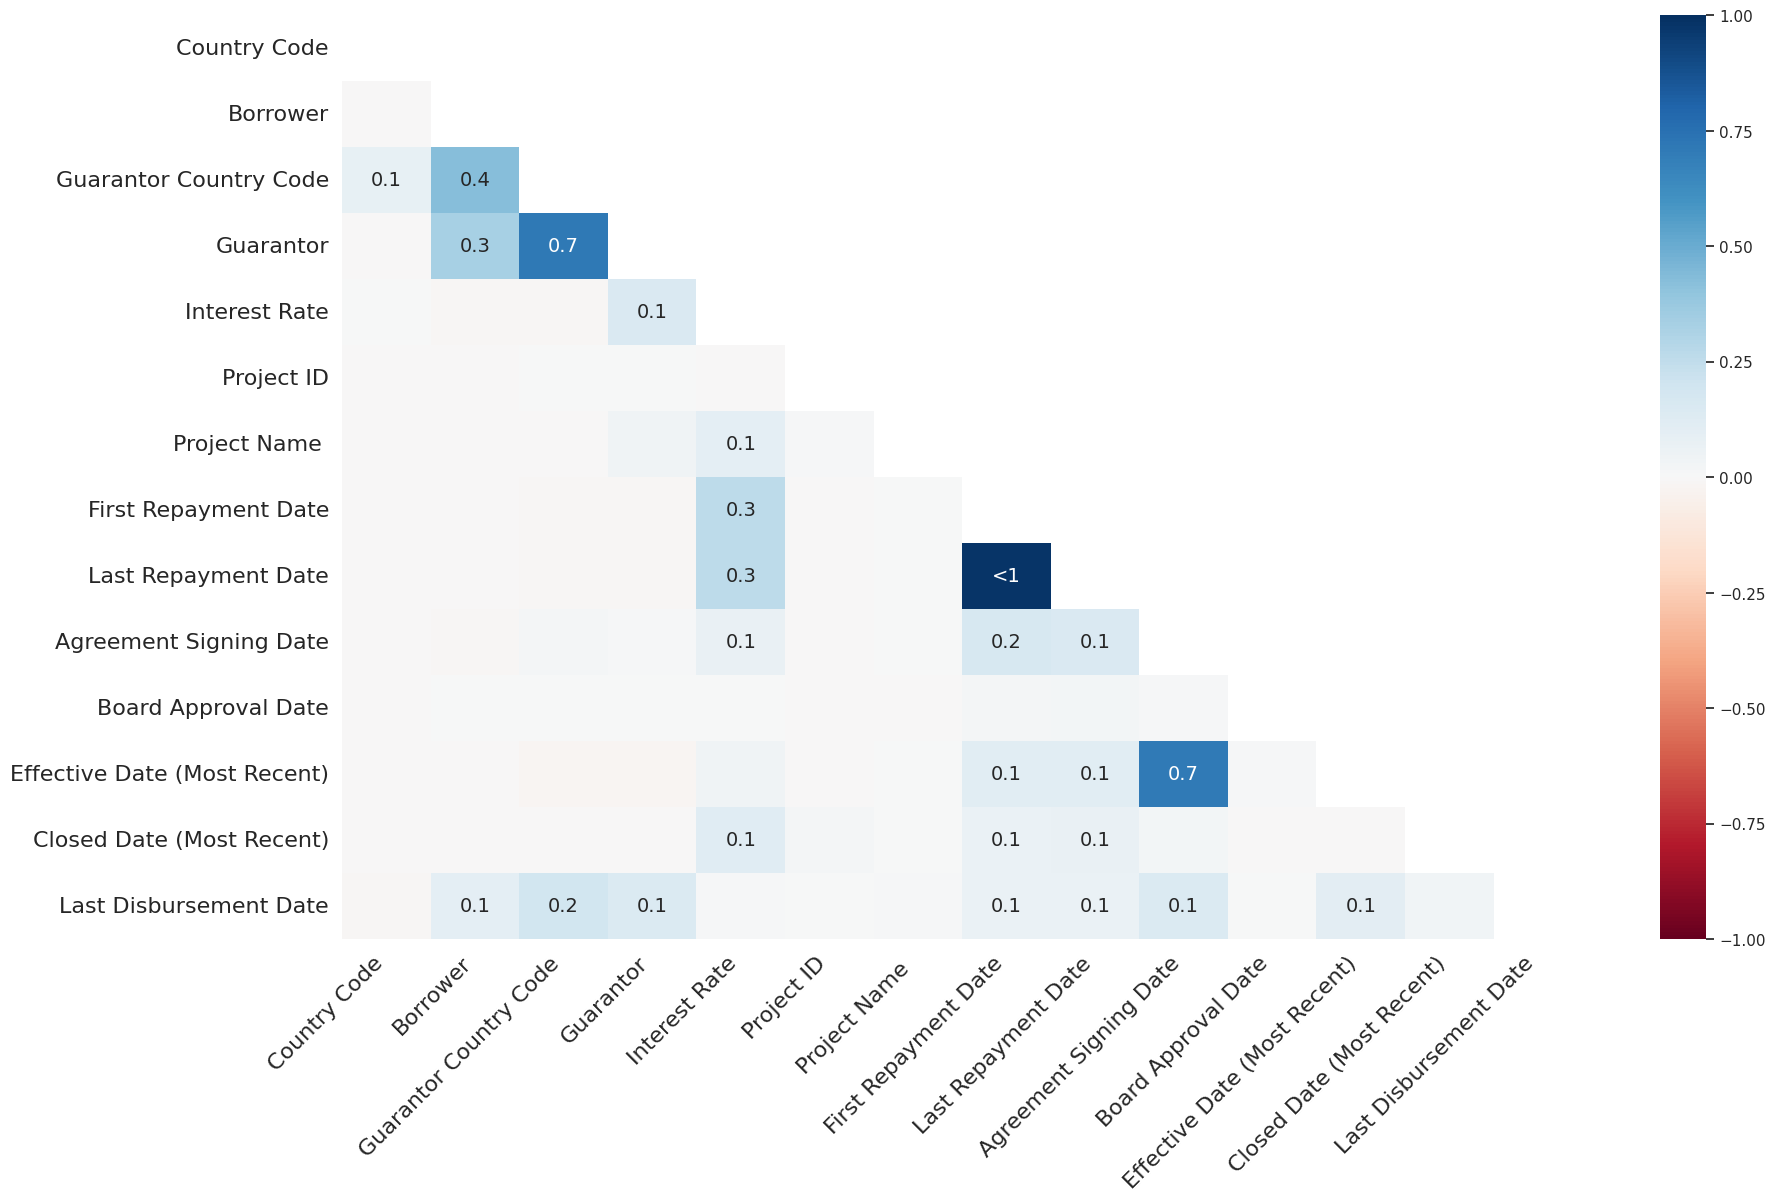

In [436]:
# Визуализируем матрицу корреляции пропущенных значений
msno.heatmap(dfnull)

Выводы:

Колонка 'Currency of Commitment' неинформативна:пропуски (100%) - удалить

Колонка 'Interest Rate' имеет ключевое значение, содержит пропуски (2.4%) - обработать

Колонки 'Guarantor Country Code', 'Guarantor': второстепенное значение - удалить

Временные колонки '... Date ': есть пропуски - восстановить по возможности или, если не важно, то удалить

Оценим пропуску на основе матрицы корреляции пропущенных значений:
- большинство корреляций близко к нулю, т.е. пропуски случайны и независимы (красного нет);
- сильная корреляция для пары First Repayment Date / Last Disbursement: поля имеют важное значение для расчета срока займа Days, поэтому в случае отсутсвия данных восстановим рассчетное значение на основе среднего по датасету;
- сильная корреляция для пар Agreement Signing Date / Effective Date + Guarantor Country Code / Guarantor: поля имеют второстепенное значение для анализа, поэтому поля могут быть удалены вместе;



### Преобразование типов

In [437]:
# Преобразуем колонки с датами в формат datetime
df['First Repayment Date'] = pd.to_datetime(df['First Repayment Date'])
df['Last Repayment Date'] = pd.to_datetime(df['Last Repayment Date'])
df['Board Approval Date'] = pd.to_datetime(df['Board Approval Date'])
df['Closed Date (Most Recent)'] = pd.to_datetime(df['Closed Date (Most Recent)'])
df['Last Disbursement Date'] = pd.to_datetime(df['Last Disbursement Date'])
df['End of Period'] = pd.to_datetime(df['End of Period'])

In [438]:
# Преобразуем колонки в формат int
df['Original Principal Amount'] = df['Original Principal Amount'].astype(int)
df['Cancelled Amount'] = df['Cancelled Amount'].astype(int)
df['Disbursed Amount'] = df['Disbursed Amount'].astype(int)
df['Undisbursed Amount'] = df['Undisbursed Amount'].astype(int)

In [439]:
# Сделаем deep copy для df
df_ibrd = df.copy(deep=True)

### Удаление строк и полей

Ключевое значение для анализа будут иметь колонки:
Количественные колонки:
- 'Interest Rate'
- 'Original Principal Amount'
- 'Days' (добавленная)

Категориальные колонки:
- 'Year', 'Decade', 'Period' (добавленные)
- 'Board Approval Date'
- 'Region', 'Megaregion' (добавленная)

Принимаем решения:
- 'Board Approval Date' - сделать индексом после преобразования типа
- 'Interest Rate' - восстановить пропуски
- 'Original Principal Amount' и 'Board Approval Date' - удалить строки с пропусками
- 'Agreement Signing Date' / 'Effective Date' - удалить строки с пропусками

Удаление строк с пропусками

In [440]:
# Определяем число строк с пропусками в 'Original Principal Amount' и 'Board Approval Date'
len(df_ibrd[df_ibrd['Board Approval Date'].isnull() | df_ibrd['Original Principal Amount'].isnull()])

2

In [441]:
# Удалим строки с пропусками в 'Original Principal Amount' и 'Board Approval Date'
# table.drop(table[table['price'].isnull()].index, inplace=True)
indx = df_ibrd[df_ibrd['Board Approval Date'].isnull() | df_ibrd['Original Principal Amount'].isnull()].index
df_ibrd.drop(indx, inplace=True)

In [442]:
# Определяем число строк с пропусками в 'Original Principal Amount' и 'Board Approval Date'
len(df_ibrd[df_ibrd['Board Approval Date'].isnull() | df_ibrd['Original Principal Amount'].isnull()])

0

Удалим избыточные строки-дубликаты

In [443]:
# Определим наличие строк-дубликатов
duplicate_rows = df_ibrd[df_ibrd.duplicated()]
f'Число строк-дубликатов составляет {int(len(duplicate_rows))}'

'Число строк-дубликатов составляет 56'

In [444]:
# Удалим избыточные строки-дубликаты с помощью drop_duplicates()
df_ibrd = df_ibrd.drop_duplicates()

In [445]:
# Убедимся в отсутствии избыточных строк-дубликатов
duplicate_rows = df_ibrd[df_ibrd.duplicated()]
f'Число строк-дубликатов составляет {int(len(duplicate_rows))}'

'Число строк-дубликатов составляет 0'

In [446]:
# Убедимся в том, что колонка 'Currency of Commitment' является пустой
len(df_ibrd['Currency of Commitment']) == df_ibrd['Currency of Commitment'].isnull().sum()

True

Удалим неинформативные поля

In [447]:
# Удалим колонку 'Currency of Commitment': не содержит никакой информации
del df_ibrd['Currency of Commitment']

In [448]:
# Удалим эти колонки, т.к. эти поля имеют второстепенное значение для анализа
del df_ibrd['Guarantor Country Code']
del df_ibrd['Guarantor']
del df_ibrd['Agreement Signing Date']
del df_ibrd['Effective Date (Most Recent)']

In [449]:
df_ibrd.shape

(1259829, 28)

### Категориальные данные

In [450]:
# Проверим наличие дублей/ошибок в названии колонок
df_ibrd.keys()

Index(['End of Period', 'Loan Number', 'Region', 'Country Code', 'Country',
       'Borrower', 'Loan Type', 'Loan Status', 'Interest Rate', 'Project ID',
       'Project Name ', 'Original Principal Amount', 'Cancelled Amount',
       'Undisbursed Amount', 'Disbursed Amount', 'Repaid to IBRD',
       'Due to IBRD', 'Exchange Adjustment', 'Borrower's Obligation',
       'Sold 3rd Party', 'Repaid 3rd Party', 'Due 3rd Party', 'Loans Held',
       'First Repayment Date', 'Last Repayment Date', 'Board Approval Date',
       'Closed Date (Most Recent)', 'Last Disbursement Date'],
      dtype='object')

In [451]:
# Проверим наличие дублей/ошибок в названиях регионов
Regions = df_ibrd['Region'].unique()
print(f'Размер номенклатуры: {len(Regions)}', Regions)

Размер номенклатуры: 12 ['EUROPE AND CENTRAL ASIA' 'LATIN AMERICA AND CARIBBEAN' 'SOUTH ASIA'
 'MIDDLE EAST AND NORTH AFRICA' 'EAST ASIA AND PACIFIC'
 'EASTERN AND SOUTHERN AFRICA' 'WESTERN AND CENTRAL AFRICA' 'AFRICA'
 'AFRICA EAST' 'AFRICA WEST' 'Eastern and Southern Africa'
 'Western and Central Africa']


In [452]:
# Устраним дубли в названиях регионов
df_ibrd['Region'] = df_ibrd['Region'].str.upper()

In [453]:
# Проверим наличие дублей в названиях регионов
Regions = df_ibrd['Region'].unique()
Regions = df_ibrd['Region'].unique()
print(f'Размер номенклатуры: {len(Regions)}', Regions)

Размер номенклатуры: 10 ['EUROPE AND CENTRAL ASIA' 'LATIN AMERICA AND CARIBBEAN' 'SOUTH ASIA'
 'MIDDLE EAST AND NORTH AFRICA' 'EAST ASIA AND PACIFIC'
 'EASTERN AND SOUTHERN AFRICA' 'WESTERN AND CENTRAL AFRICA' 'AFRICA'
 'AFRICA EAST' 'AFRICA WEST']


In [454]:
# Колонки 'Country' и 'Country Code'
# Country = df_ibrd['Country'].unique()
# Country_Code = df_ibrd['Country Code'].unique()
# f"В колонке 'Country' имеются дубли в количестве: {len(Country) - len(Country_Code)} шт"

In [455]:
# Проверим колонку 'Loan Type'
Loan_Types = df_ibrd['Loan Type'].unique()
Loan_Types = np.sort(Loan_Types)
Loan_Types
# Вывод: дублей и шума нет

array(['BLNC', 'BLNR', 'BLOAN', 'CPL', 'FSL', 'GUBF', 'GURB', 'Guarantee',
       'NON POOL', 'NPL', 'POOL LOAN', 'SCL', 'SCP EUR', 'SCP JPY',
       'SCP USD', 'SCPD', 'SCPM', 'SCPY', 'SNGL CRNCY'], dtype=object)

In [456]:
# Проверим колонку 'Loan Status'
Loan_Status = df_ibrd['Loan Status'].unique()
Loan_Status = np.sort(Loan_Status)
Loan_Status
# Вывод: дублей и шума нет

array(['Approved', 'Cancelled', 'Disbursed', 'Disbursing',
       'Disbursing&Repaying', 'Effective', 'Fully Cancelled',
       'Fully Disbursed', 'Fully Repaid', 'Fully Transferred', 'Repaid',
       'Repaying', 'Signed', 'Terminated'], dtype=object)

In [457]:
df_ibrd.keys()

Index(['End of Period', 'Loan Number', 'Region', 'Country Code', 'Country',
       'Borrower', 'Loan Type', 'Loan Status', 'Interest Rate', 'Project ID',
       'Project Name ', 'Original Principal Amount', 'Cancelled Amount',
       'Undisbursed Amount', 'Disbursed Amount', 'Repaid to IBRD',
       'Due to IBRD', 'Exchange Adjustment', 'Borrower's Obligation',
       'Sold 3rd Party', 'Repaid 3rd Party', 'Due 3rd Party', 'Loans Held',
       'First Repayment Date', 'Last Repayment Date', 'Board Approval Date',
       'Closed Date (Most Recent)', 'Last Disbursement Date'],
      dtype='object')

### Добавление полей

Добавим аналитические поля:

- Year, Decade, Period: поля для анализа временных рядов;

- Days: количественное поле для оценки срока займа;

- MegaRegion: рационализация географической структуры;


In [458]:
# Year
df_ibrd['Year'] = df_ibrd['Board Approval Date'].dt.year

In [459]:
df_ibrd['Year'].unique()

array([1947, 1948, 1949, 1951, 1950, 1954, 1952, 1953, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1974, 1967,
       1968, 1969, 1970, 1975, 1971, 1973, 1972, 1978, 1976, 1984, 1977,
       1983, 1985, 1979, 1980, 1981, 1986, 1982, 1987, 1990, 1991, 1988,
       1989, 1992, 1999, 1993, 1996, 1994, 1995, 1997, 2001, 1998, 2002,
       2000, 2006, 2007, 2003, 2004, 2005, 2008, 2009, 2010, 2011, 2015,
       2012, 2013, 2014, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [460]:
# Number of loan deals
df_ibrd['Number of loan deals'] = 1

In [461]:
# Decade
df_ibrd.loc[(df_ibrd['Year'] >= 1947) & (df_ibrd['Year'] < 1960), ['Decade']] = '1950s'
df_ibrd.loc[(df_ibrd['Year'] >= 1960) & (df_ibrd['Year'] < 1970), ['Decade']] = '1960s'
df_ibrd.loc[(df_ibrd['Year'] >= 1970) & (df_ibrd['Year'] < 1980), ['Decade']] = '1970s'
df_ibrd.loc[(df_ibrd['Year'] >= 1980) & (df_ibrd['Year'] < 1990), ['Decade']] = '1980s'
df_ibrd.loc[(df_ibrd['Year'] >= 1990) & (df_ibrd['Year'] < 2000), ['Decade']] = '1990s'
df_ibrd.loc[(df_ibrd['Year'] >= 2000) & (df_ibrd['Year'] < 2010), ['Decade']] = '2000s'
df_ibrd.loc[(df_ibrd['Year'] >= 2010) & (df_ibrd['Year'] < 2020), ['Decade']] = '2010s'
df_ibrd.loc[(df_ibrd['Year'] >= 2020) & (df_ibrd['Year'] < 2030), ['Decade']] = '2020s'

In [462]:
# Deca_int
df_ibrd.loc[(df_ibrd['Year'] >= 1947) & (df_ibrd['Year'] < 1960), ['Deca_int']] = 1950
df_ibrd.loc[(df_ibrd['Year'] >= 1960) & (df_ibrd['Year'] < 1970), ['Deca_int']] = 1960
df_ibrd.loc[(df_ibrd['Year'] >= 1970) & (df_ibrd['Year'] < 1980), ['Deca_int']] = 1970
df_ibrd.loc[(df_ibrd['Year'] >= 1980) & (df_ibrd['Year'] < 1990), ['Deca_int']] = 1980
df_ibrd.loc[(df_ibrd['Year'] >= 1990) & (df_ibrd['Year'] < 2000), ['Deca_int']] = 1990
df_ibrd.loc[(df_ibrd['Year'] >= 2000) & (df_ibrd['Year'] < 2010), ['Deca_int']] = 2000
df_ibrd.loc[(df_ibrd['Year'] >= 2010) & (df_ibrd['Year'] < 2020), ['Deca_int']] = 2010
df_ibrd.loc[(df_ibrd['Year'] >= 2020) & (df_ibrd['Year'] < 2030), ['Deca_int']] = 2020

In [463]:
# 25yeras Period
df_ibrd.loc[(df_ibrd['Year'] >= 1947) & (df_ibrd['Year'] < 1967), ['Period']] = '1947...1966'
df_ibrd.loc[(df_ibrd['Year'] >= 1967) & (df_ibrd['Year'] < 1987), ['Period']] = '1967...1986'
df_ibrd.loc[(df_ibrd['Year'] >= 1987) & (df_ibrd['Year'] < 2007), ['Period']] = '1987...2006'
df_ibrd.loc[(df_ibrd['Year'] >= 2007) & (df_ibrd['Year'] < 2027), ['Period']] = '2007...2026'

In [464]:
df_ibrd['Period'].value_counts() # Проверим

1987...2006    542985
1967...1986    437389
2007...2026    203109
1947...1966     76346
Name: Period, dtype: int64

In [465]:
# MegaRegion - рационализируем номенклатуру регионов
df_ibrd['MegaRegion'] = 'AFRICA'
df_ibrd.loc[ (df_ibrd['Region'] == 'EUROPE AND CENTRAL ASIA'), ['MegaRegion'] ] = 'EUROPE'
df_ibrd.loc[ (df_ibrd['Region'] == 'LATIN AMERICA AND CARIBBEAN'), ['MegaRegion'] ] = 'AMERICA'
df_ibrd.loc[ (df_ibrd['Region'] == 'EAST ASIA AND PACIFIC') | (df_ibrd['Region'] == 'SOUTH ASIA'), ['MegaRegion'] ] = 'ASIA'
df_ibrd.loc[ (df_ibrd['Region'] == 'MIDDLE EAST AND NORTH AFRICA') | (df_ibrd['Region'] == 'WESTERN AND CENTRAL AFRICA') | (df_ibrd['Region'] == 'AFRICA EAST') | (df_ibrd['Region'] == 'AFRICA WEST'), ['MegaRegion'] ] = 'AFRICA'
df_ibrd['MegaRegion'].unique() # Проверим

array(['EUROPE', 'AMERICA', 'ASIA', 'AFRICA'], dtype=object)

In [466]:
# Days
import datetime as dt
df_ibrd['Number_of_Days'] = abs(df_ibrd['Last Repayment Date'] - df_ibrd['First Repayment Date'])
df_ibrd['Days'] = df_ibrd['Number_of_Days'].dt.days # Перевод timedelta в числовой формат
# df_ibrd['Days'] = df_ibrd['Days'].astype(int) # Вернемся после обработки пропусков
type(df_ibrd['Days'][1]) # Проверим

numpy.float64

In [467]:
# Days - есть пропуски, поэтому вернемся к этой колонке при обработке пропусков
df_ibrd['Days'].isnull().sum()

3750

In [468]:
df_ibrd.shape

(1259829, 36)

### Обработка пропущенных значений

Interest Rate

In [469]:
# Колонка 'Interest Rate': определим число ячеек, где отсутствуют значения методом isnull
print('Пропуски:', df_ibrd['Interest Rate'].isnull().sum(), 'шт')
print('Пропуски:', round(df_ibrd['Interest Rate'].isnull().mean()*100, 1), '%')

Пропуски: 30047 шт
Пропуски: 2.4 %


In [470]:
# Колонка 'Interest Rate': определим минимальное значение в колонке
df_ibrd['Interest Rate'].min()

0.0

In [471]:
# Колонка 'Interest Rate': определим среднее и минимальное значение по годам
grouper = df_ibrd.groupby('Year')
grouper['Interest Rate'].agg([np.mean, min])

mean   min
Year                
1947  4.243421  4.00
1948  3.713363  3.56
1949  3.921053  3.00
1950  3.994524  3.50
1951  4.267841  3.75
...        ...   ...
2019  0.000000  0.00
2020  0.000000  0.00
2021  0.000000  0.00
2022  0.000000  0.00
2023  0.000000  0.00

[77 rows x 2 columns]

In [472]:
# Фактически данные о значениях 'Interest Rate' в период 2009-2023 гг. отсутствуют
zero = pd.DataFrame(grouper['Interest Rate'].mean() == 0)
for year, zerotest in zero.iterrows():
  if zerotest.bool():
    print(zerotest)

Interest Rate    True
Name: 2009, dtype: bool
Interest Rate    True
Name: 2010, dtype: bool
Interest Rate    True
Name: 2011, dtype: bool
Interest Rate    True
Name: 2012, dtype: bool
Interest Rate    True
Name: 2013, dtype: bool
Interest Rate    True
Name: 2014, dtype: bool
Interest Rate    True
Name: 2015, dtype: bool
Interest Rate    True
Name: 2016, dtype: bool
Interest Rate    True
Name: 2017, dtype: bool
Interest Rate    True
Name: 2018, dtype: bool
Interest Rate    True
Name: 2019, dtype: bool
Interest Rate    True
Name: 2020, dtype: bool
Interest Rate    True
Name: 2021, dtype: bool
Interest Rate    True
Name: 2022, dtype: bool
Interest Rate    True
Name: 2023, dtype: bool


По колонке 'Interest Rate' примем как условно верные утверждения:
1. отсутствие значения эквавалентно нулю для 1947-2008 гг.;
2. отсутствие значения эквавалентно среднему значению для 2009-2023 гг.;


In [473]:
# Колонка 'Interest Rate': заменим пропуски на нулевое значение для периода до 2009 г.
df_ibrd.loc[(df_ibrd['Year'] < 2009) & (df_ibrd['Interest Rate'].isnull()), ['Interest Rate']] = df_ibrd['Interest Rate'].min()

In [474]:
# Колонка 'Interest Rate': заменим пропуски на среднее значение для периода 2009-2023 гг.
avg = df_ibrd['Interest Rate'].mean()
df_ibrd.loc[(df_ibrd['Year'] >= 2009), ['Interest Rate']] = df_ibrd['Interest Rate'].mean()

In [475]:
df_ibrd['Interest Rate'].tail()

1259882    0.00
1259883    7.95
1259884    8.25
1259885    8.25
1259886    9.25
Name: Interest Rate, dtype: float64

In [476]:
# Проверим отсуствие пропусков после замены
print('Пропуски:', df_ibrd['Interest Rate'].isnull().sum(), 'шт')
print('Пропуски:', round(df_ibrd['Interest Rate'].isnull().mean()*100, 1), '%')

Пропуски: 0 шт
Пропуски: 0.0 %


Last Disbursement Date



In [477]:
# Проверим число пропусков до замены
print('Пропуски:', df_ibrd['Last Disbursement Date'].isnull().sum(), 'шт')
print('Пропуски:', round(df_ibrd['Last Disbursement Date'].isnull().mean()*100, 1), '%')

Пропуски: 515526 шт
Пропуски: 40.9 %


In [478]:
# Колонка 'Last Disbursement Date': заменим пропуски на дату из колонки 'Last Repayment Date'
# Будем считать корректным замену NaN в 'Last Disbursement Date' на 'Last Repayment Date'
df_ibrd['Last Disbursement Date'].fillna(df_ibrd['Last Repayment Date'], inplace=True)

In [479]:
# Проверим число пропусков после замены
print('Пропуски:', df_ibrd['Last Disbursement Date'].isnull().sum(), 'шт')
print('Пропуски:', round(df_ibrd['Last Disbursement Date'].isnull().mean()*100, 1), '%')

Пропуски: 3599 шт
Пропуски: 0.3 %


In [480]:
# Число пропусков после замены в 'Last Disbursement Date' и 'Last Repayment Date' совпадают
np.sum(df_ibrd['Last Disbursement Date'].isnull()) == np.sum(df_ibrd['Last Repayment Date'].isnull())

True

Project Name

In [481]:
# Проверим число пропусков
print('Пропуски:', df_ibrd['Project Name '].isnull().sum(), 'шт')
print('Пропуски:', round(df_ibrd['Project Name '].isnull().mean()*100, 1), '%')

Пропуски: 159114 шт
Пропуски: 12.6 %


In [482]:
# Колонка 'Project Name': заменим пропуски на Project ID
# df_ibrd['Project Name '].fillna(df_ibrd['Project ID'], inplace=True)

In [483]:
# Проверим число пропусков
print('Пропуски:', df_ibrd['Project Name '].isnull().sum(), 'шт')
print('Пропуски:', round(df_ibrd['Project Name '].isnull().mean()*100, 1), '%')

Пропуски: 159114 шт
Пропуски: 12.6 %


Days

In [484]:
# Проверим число пропусков
print('Пропуски:', df_ibrd['Days'].isnull().sum(), 'шт')
print('Пропуски:', round(df_ibrd['Days'].isnull().mean()*100, 1), '%')

Пропуски: 3750 шт
Пропуски: 0.3 %


In [485]:
# Колонка 'Project Name': заменим пропуски на среднее значение
df_ibrd['Days'].fillna(df_ibrd['Days'].mean(), inplace=True)

In [486]:
# Проверим число пропусков
print('Пропуски:', df_ibrd['Days'].isnull().sum(), 'шт')
print('Пропуски:', round(df_ibrd['Days'].isnull().mean()*100, 1), '%')

Пропуски: 0 шт
Пропуски: 0.0 %


In [487]:
# Конвертируем тип данных: Floats to Integers
df_ibrd['Days'] = df_ibrd['Days'].astype(int)

In [488]:
df_ibrd['Days'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1259829 entries, 0 to 1259886
Series name: Days
Non-Null Count    Dtype
--------------    -----
1259829 non-null  int64
dtypes: int64(1)
memory usage: 19.2 MB


### Сортировка датасета

In [489]:
# Сортировка датасета по 'Board Approval Date'
df_ibrd = df_ibrd.sort_values(by=['Board Approval Date'], kind='quicksort')
df_ibrd['Board Approval Date']

0         1947-05-09
209257    1947-05-09
209256    1947-05-09
209253    1947-05-09
209252    1947-05-09
             ...    
1259763   2023-10-26
1259765   2023-10-26
1259767   2023-10-27
1259766   2023-10-30
1259768   2023-10-30
Name: Board Approval Date, Length: 1259829, dtype: datetime64[ns]

In [490]:
# Cреди колонок в формате datetime основная колонка для анализа: 'Board Approval Date'
# Определим поле 'Board Approval Date' как индекс для датасета
# df = df.set_index(df_ibrd['Board Approval Date'])
# Отсортирем колонки по возрастанию
# df_ibrd.sort_index(axis=0, ascending=True)
# df_ibrd.sort_values(by=['Board Approval Date'], kind='quicksort')

In [491]:
# Проверим число пропусков по датасету
df_ibrd.isnull().mean()*100

End of Period                 0.000000
Loan Number                   0.000000
Region                        0.000000
Country Code                  0.024130
Country                       0.000000
Borrower                      0.692316
Loan Type                     0.000000
Loan Status                   0.000000
Interest Rate                 0.000000
Project ID                    0.003334
Project Name                 12.629809
Original Principal Amount     0.000000
Cancelled Amount              0.000000
Undisbursed Amount            0.000000
Disbursed Amount              0.000000
Repaid to IBRD                0.000000
Due to IBRD                   0.000000
Exchange Adjustment           0.000000
Borrower's Obligation         0.000000
Sold 3rd Party                0.000000
Repaid 3rd Party              0.000000
Due 3rd Party                 0.000000
Loans Held                    0.000000
First Repayment Date          0.297659
Last Repayment Date           0.285674
Board Approval Date      

### Работа с выбросами

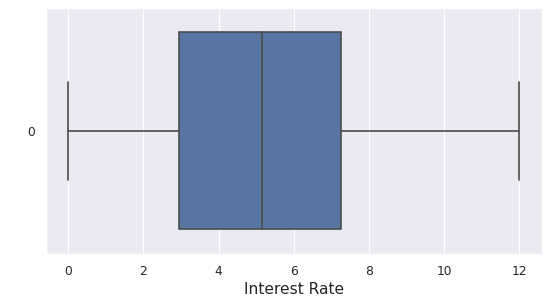

In [492]:
# Построим boxplot для Interest Rate
# Визуально ясно, что значительных выбросов нет
plt.figure(figsize=(8,4), dpi= 80)
sns.boxplot(df_ibrd['Interest Rate'], orient="h")
plt.xlabel('Interest Rate', fontsize = 14)
plt.ylabel(' ', fontsize = 14)
plt.show()

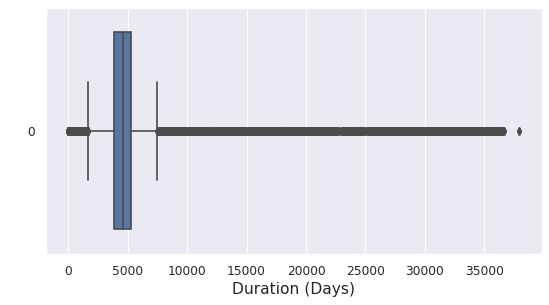

In [493]:
# Построим boxplot для Days
# Визуально ясно, что значительных выбросов нет
plt.figure(figsize=(8,4), dpi= 80)
sns.boxplot(df_ibrd['Days'], orient="h")
plt.xlabel('Duration (Days)', fontsize = 14)
plt.ylabel(' ', fontsize = 14)
plt.show()

In [494]:
# Исключим выбросы на основе межквартильного интервала (1.5 IQR)
# Для удобства создадим df_fix Датафрейм без выбросов по колонке Days
df_out = df_ibrd.loc[:,['Year', 'Period', 'Decade', 'Deca_int','Country', 'MegaRegion', 'Region',
                        'Board Approval Date', 'Loan Status', 'Loan Type',
                        'Cancelled Amount', 'Interest Rate','Number of loan deals',
                        'Original Principal Amount', 'Disbursed Amount', 'Days']]
# найдем границы 1.5 * IQR
q1 = df_out['Days'].quantile(0.25)
q3 = df_out['Days'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print('Границы для переменной Days 1.5 * IQR:')
print(lower_bound, upper_bound)
# применим эти границы, чтобы найти выбросы в поле Days
df_out[(df_out.Days < lower_bound) | (df_out.Days > upper_bound)].head(3)
# найдем значения без выбросов (переворачиваем маску)
# df_out[~((df_out.Days < lower_bound) | (df_out.Days > upper_bound))].head()
# найдем значения без выбросов (переворачиваем маску)
df_fix = df_out[(df_out.Days > lower_bound) & (df_out.Days < upper_bound)]
df_fix.head(3)

Границы для переменной Days 1.5 * IQR:
1642.0 7490.0


Year       Period Decade  Deca_int      Country MegaRegion  \
73316   1947  1947...1966  1950s    1950.0  Netherlands     EUROPE   
191653  1947  1947...1966  1950s    1950.0  Netherlands     EUROPE   
191652  1947  1947...1966  1950s    1950.0  Netherlands     EUROPE   

                         Region Board Approval Date Loan Status Loan Type  \
73316   EUROPE AND CENTRAL ASIA          1947-08-07      Repaid  NON POOL   
191653  EUROPE AND CENTRAL ASIA          1947-08-07      Repaid  NON POOL   
191652  EUROPE AND CENTRAL ASIA          1947-08-07      Repaid  NON POOL   

        Cancelled Amount  Interest Rate  Number of loan deals  \
73316                  0           4.25                     1   
191653                 0           4.25                     1   
191652                 0           4.25                     1   

        Original Principal Amount  Disbursed Amount  Days  
73316                   191044211         191044211  7488  
191653                  191044211         191044211  7488  
191652                  191044211         191044211  7488

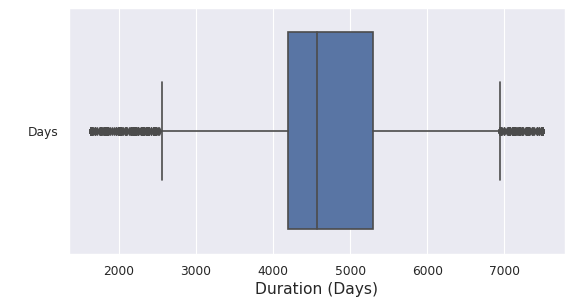

In [495]:
# Применим границы, чтобы исключить выбросы для 'Days'
# маска: [(df_ibrd.Days > lower_bound) & (df_ibrd.Days < upper_bound)]
plt.figure(figsize=(8,4), dpi= 80)
sns.boxplot(df_ibrd.loc[(df_ibrd.Days > lower_bound) & (df_ibrd.Days < upper_bound), ['Days']], orient="h")
plt.xlabel('Duration (Days)', fontsize = 14)
plt.ylabel(' ', fontsize = 14)
plt.show()

В дальнейшем можно:

1. использовать полученную маску при визуализации Days

    [(df_ibrd.Days > lower_bound) & (df_ibrd.Days < upper_bound)];

2. использовать датафрейм без выбросов по Days;

In [496]:
# В результате предварительной обратоки данных имеем следующий датасет
df_ibrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259829 entries, 0 to 1259768
Data columns (total 36 columns):
 #   Column                     Non-Null Count    Dtype          
---  ------                     --------------    -----          
 0   End of Period              1259829 non-null  datetime64[ns] 
 1   Loan Number                1259829 non-null  object         
 2   Region                     1259829 non-null  object         
 3   Country Code               1259525 non-null  object         
 4   Country                    1259829 non-null  object         
 5   Borrower                   1251107 non-null  object         
 6   Loan Type                  1259829 non-null  object         
 7   Loan Status                1259829 non-null  object         
 8   Interest Rate              1259829 non-null  float64        
 9   Project ID                 1259787 non-null  object         
 10  Project Name               1100715 non-null  object         
 11  Original Principal Amoun

In [497]:
ls = np.sort(df_ibrd.keys())
ls.tolist()

['Board Approval Date',
 'Borrower',
 "Borrower's Obligation",
 'Cancelled Amount',
 'Closed Date (Most Recent)',
 'Country',
 'Country Code',
 'Days',
 'Deca_int',
 'Decade',
 'Disbursed Amount',
 'Due 3rd Party',
 'Due to IBRD',
 'End of Period',
 'Exchange Adjustment',
 'First Repayment Date',
 'Interest Rate',
 'Last Disbursement Date',
 'Last Repayment Date',
 'Loan Number',
 'Loan Status',
 'Loan Type',
 'Loans Held',
 'MegaRegion',
 'Number of loan deals',
 'Number_of_Days',
 'Original Principal Amount',
 'Period',
 'Project ID',
 'Project Name ',
 'Region',
 'Repaid 3rd Party',
 'Repaid to IBRD',
 'Sold 3rd Party',
 'Undisbursed Amount',
 'Year']

## 3.Описательная статистика

In [498]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [499]:
# Описательная статистика по основных полям датасета
df_ibrd[['Board Approval Date', 'Interest Rate', 'Original Principal Amount', 'Cancelled Amount', 'Disbursed Amount', 'Undisbursed Amount', 'Due to IBRD', 'Days']].describe().round(2)

Interest Rate  Original Principal Amount  Cancelled Amount  \
count     1259829.00               1.259829e+06      1.259829e+06   
mean            4.89               8.362619e+07      1.029487e+07   
std             2.96               1.550324e+08      4.678471e+07   
min             0.00               0.000000e+00      0.000000e+00   
25%             2.94               1.200000e+07      0.000000e+00   
50%             5.16               3.300000e+07      2.090000e+02   
75%             7.25               9.655000e+07      3.757915e+06   
max            12.00               3.750000e+09      1.995000e+09   

       Disbursed Amount  Undisbursed Amount   Due to IBRD        Days  
count      1.259829e+06        1.259829e+06  1.259829e+06  1259829.00  
mean       6.511998e+07        8.084495e+06  2.221679e+07     5122.47  
std        1.356284e+08        5.182321e+07  9.991691e+07     3919.03  
min        0.000000e+00       -1.226600e+08 -1.483090e+08        0.00  
25%        6.704300e+06        0.000000e+00  0.000000e+00     3835.00  
50%        2.320000e+07        0.000000e+00  0.000000e+00     4565.00  
75%        6.810681e+07        0.000000e+00  0.000000e+00     5297.00  
max        3.153531e+09        3.379011e+09  2.923282e+09    37937.00

In [500]:
# Типичный средний займ в МБРР: Amount, Rate, Days
a = round(df_ibrd['Original Principal Amount'].mean() / 1000_000, 1)
r = round(df_ibrd['Interest Rate'].mean(), 2)
d = round(df_ibrd['Days'].mean()/365, 1)
print('-'*110), print('-'*110)
print("Типичный средний займ в МБРР:")
print(f"размер - {a} млн долл., процентная ставка - {r} %, срок займа - {d} лет")
print('-'*110)
print('-'*110)

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Типичный средний займ в МБРР:
размер - 83.6 млн долл., процентная ставка - 4.89 %, срок займа - 14.0 лет
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


In [501]:
# Типовые значения по 'Interest Rate'
df_ibrd['Interest Rate'].value_counts()

4.351244    166027
0.000000    163081
7.250000     54555
8.500000     40435
5.590000     34197
             ...  
5.600000         1
5.530000         1
5.130000         1
4.800000         1
4.730000         1
Name: Interest Rate, Length: 597, dtype: int64

In [502]:
# Количество сделок в разерезе статуста сделки 'Loan Status'
df_ibrd['Loan Status'].value_counts()

Fully Repaid           531280
Repaid                 370523
Repaying                87282
Disbursed               83405
Disbursing              80144
Fully Disbursed         22967
Fully Transferred       18270
Fully Cancelled         18045
Cancelled               12678
Disbursing&Repaying     11409
Terminated               7523
Approved                 7007
Effective                4791
Signed                   4505
Name: Loan Status, dtype: int64

In [503]:
# Количество сделок в разерезе регионов 'Region'
df_ibrd['Region'].value_counts()

LATIN AMERICA AND CARIBBEAN     401775
EAST ASIA AND PACIFIC           280623
EUROPE AND CENTRAL ASIA         243882
MIDDLE EAST AND NORTH AFRICA    150039
AFRICA                           82359
SOUTH ASIA                       69676
AFRICA WEST                       8286
AFRICA EAST                       8028
WESTERN AND CENTRAL AFRICA        7598
EASTERN AND SOUTHERN AFRICA       7563
Name: Region, dtype: int64

### Сводные таблицы

In [504]:
# style
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}

In [505]:
# Динамика по декадам: показатели Rate/Amount по 'Decade'
table_Decade = df_ibrd.pivot_table(
    # values=['Interest Rate'],
    values=['Interest Rate', 'Number of loan deals'],
    index='Decade',
    columns=['MegaRegion'],
    aggfunc= {
        'Number of loan deals': 'sum',
        'Interest Rate': 'mean'
        },
    margins=True
)
table_Decade = table_Decade.style.format(precision=2, thousands=".", decimal=",")

In [506]:
table_Decade.set_table_styles([cell_hover, index_names, headers])
# style
table_Decade.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

In [507]:
# Крупнейшие проекты МБРР: показатели по 'Project Name'
table_ProjectName = df_ibrd.pivot_table(
    values=['Original Principal Amount', 'Interest Rate', 'Days', 'Number of loan deals'],
    index=['Project Name ', 'Decade', 'MegaRegion'],
    aggfunc={
    'Original Principal Amount': 'sum',
    'Interest Rate': 'mean',
    'Days': 'mean',
    'Number of loan deals': 'sum'}
)
table_Top10Project = table_ProjectName.sort_values(by=['Original Principal Amount'], kind='quicksort', ascending=False).head(10)

table_Top10Project = table_Top10Project.style.format(precision=2, thousands=".", decimal=",")

In [508]:
table_Top10Project.set_table_styles([cell_hover, index_names, headers])
# style
table_Top10Project.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

In [509]:
# Уровень процентных ставок по регионам 'Region'
from scipy import stats
rate = df_ibrd.loc[(df_ibrd['Year']), ['MegaRegion', 'Region', 'Interest Rate']]
grouper = rate.groupby(['MegaRegion', 'Region'])
table_rate = grouper['Interest Rate'].agg([np.mean, np.median, np.min, np.max, stats.mode]).round(2)

table_rate = table_rate.style.format(precision=3, thousands=".", decimal=",")

In [510]:
table_rate.set_table_styles([cell_hover, index_names, headers])
# style
table_rate.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

In [511]:
# Распределение Rate/Amount по статусу сделки ('Loan Status')
table_LoanStatus = df_ibrd.pivot_table(
    values=['Original Principal Amount', 'Interest Rate', 'Number of loan deals'],
    index='Loan Status',
    aggfunc={
    'Original Principal Amount': 'sum',
    'Number of loan deals': 'sum',
    'Interest Rate': 'mean'}
)
table_LoanStatus = table_LoanStatus.sort_values(by=['Original Principal Amount'], kind='quicksort', ascending=False).round(2)

table_LoanStatus = table_LoanStatus.style.format(precision=2, thousands=".", decimal=",")

In [512]:
# style
table_LoanStatus.set_table_styles([cell_hover, index_names, headers])
# style
table_LoanStatus.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

In [513]:
# Медиана по Loan Days / Rate в разрезе 'MegaRegion'/'Period'
table_Region = df_ibrd.pivot_table(
    values=['Days', 'Interest Rate'],
    index='MegaRegion',
    columns=['Period'],
    aggfunc={
    'Days': 'median',
    'Interest Rate': 'mean'},
)
# style
table_Region = table_Region.style.format(precision=2, thousands=".", decimal=",")

In [514]:
# style
table_Region.set_table_styles([cell_hover, index_names, headers])
# style
table_Region.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

In [515]:
# Number of loans / Amount в разрезе 'MegaRegion'/'Period'
table_MegaRegion = df_ibrd.pivot_table(
    values=['Number of loan deals', 'Original Principal Amount'],
    index='MegaRegion',
    columns=['Period'],
    # aggfunc=[np.sum, np.median],
    aggfunc={
        'Number of loan deals': 'sum',
        'Original Principal Amount': 'sum'
    }
)
# style
table_MegaRegion = table_MegaRegion.style.format(precision=2, thousands=".", decimal=",")

In [516]:
# style
table_MegaRegion.set_table_styles([cell_hover, index_names, headers])
# style
table_MegaRegion.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

In [517]:
# Крупнейшие страны-заемщики МБРР по выплаченным займам
data = df_ibrd.loc[(df_ibrd['Loan Status'] == 'Fully Repaid') | (df_ibrd['Loan Status'] == 'Repaid'),['Country', 'Number of loan deals', 'Original Principal Amount']].groupby(['Country'], as_index=False).sum()
data_top10_country = data.sort_values(by='Original Principal Amount', ascending=False).head(10)

# style
data_top10_country = data_top10_country.style.format(precision=2, thousands=".", decimal=",")

In [518]:
# style
data_top10_country.set_table_styles([cell_hover, index_names, headers])
# style
data_top10_country.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

In [519]:
# Крупнейшие страны-заемщики МБРР по объемам всех операций
data = df_ibrd.loc[:,['Country', 'Number of loan deals', 'Original Principal Amount']].groupby(['Country'], as_index=False).sum()
data_top10_country_tot = data.sort_values(by='Original Principal Amount', ascending=False).head(10)

# style
data_top10_country_tot = data_top10_country_tot.style.format(precision=2, thousands=".", decimal=",")

In [520]:
# style
data_top10_country_tot.set_table_styles([cell_hover, index_names, headers])
# style
data_top10_country_tot.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

Russian Federation

In [521]:
# Russian Federation
data_russia = df_ibrd.loc[df_ibrd['Country'] == 'Russian Federation']

In [522]:
# Крупнейшие проекты РФ: показатели по 'Project Name'
table_ProjectName = data_russia.pivot_table(
    values=['Original Principal Amount', 'Days', 'Interest Rate'],
    index=['Project Name ', 'Decade', 'MegaRegion'],
    aggfunc={
    'Original Principal Amount': 'sum',
    'Days': 'mean',
    'Interest Rate': 'mean'}
)
table_Top10Prjct = table_ProjectName.sort_values(by=['Original Principal Amount'], kind='quicksort', ascending=False).head(10).round(2)

# style
table_Top10Prjct = table_Top10Prjct.style.format(precision=2, thousands=".", decimal=",")

In [523]:
# style
table_Top10Prjct.set_table_styles([cell_hover, index_names, headers])
# style
table_Top10Prjct.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

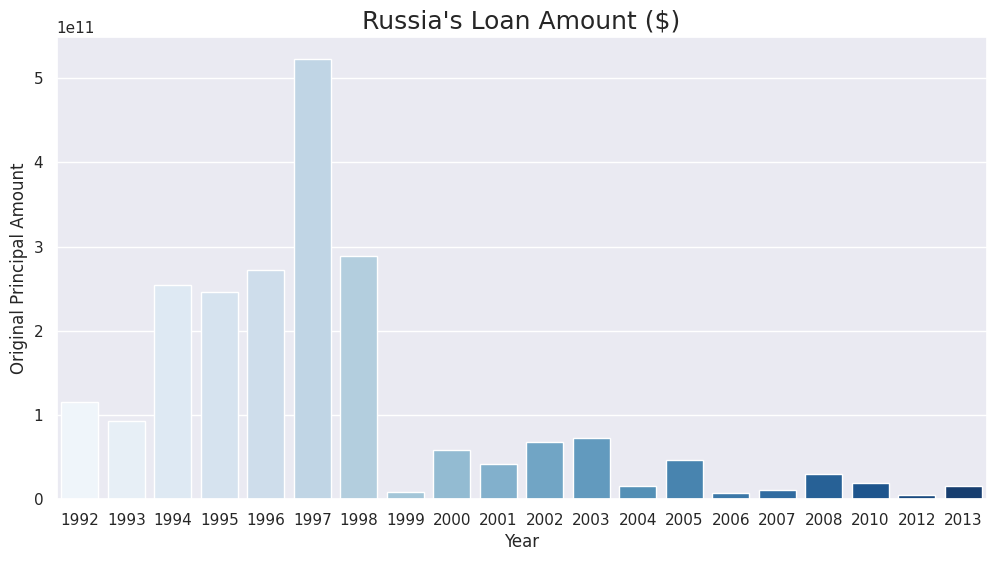

In [524]:
# Динамика займов России
df_rus = data_russia.loc[(data_russia['Year'] > 1990), ['Year', 'Original Principal Amount']]
df_rus = df_rus.groupby(['Year'], as_index=False).sum().sort_values(by='Year', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Original Principal Amount', palette='Blues', data=df_rus)
plt.title("Russia's Loan Amount ($)", fontsize=18)
plt.show()

### Histplot: распределения

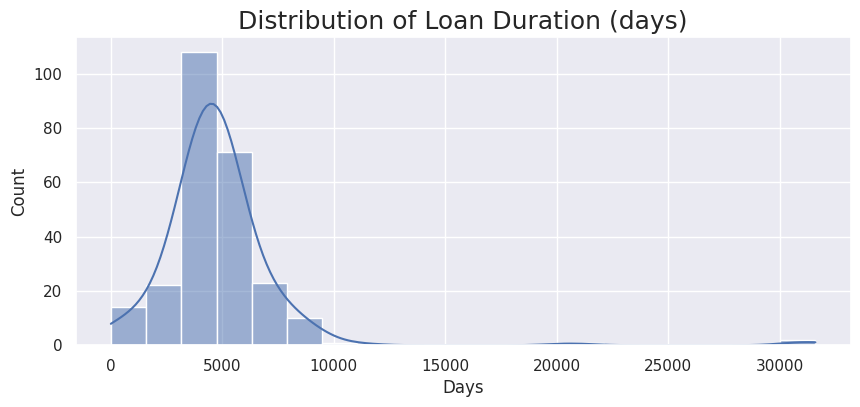

In [525]:
# Распределение по сроку займа (в днях)
plt.figure(figsize=(10, 4))
smpl = df_ibrd.sample(frac = 0.0002, random_state = 42)
sns.histplot(data = smpl, x = 'Days', bins = 20, kde = True)
plt.title('Distribution of Loan Duration (days)', fontsize=18)
plt.show()

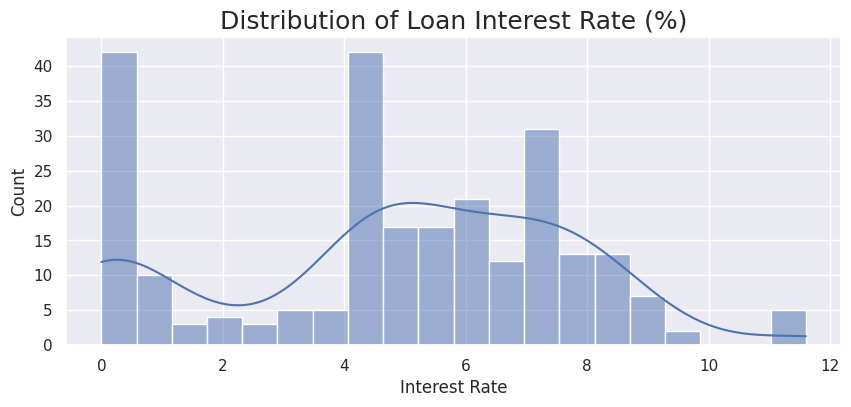

In [526]:
# Распределение по уровню процентных ставок Interest Rate
plt.figure(figsize=(10, 4))
smpl = df_ibrd.sample(frac = 0.0002, random_state = 42)
sns.histplot(data = smpl, x = 'Interest Rate', bins = 20, kde = True)
plt.title('Distribution of Loan Interest Rate (%)', fontsize=18)
plt.show()

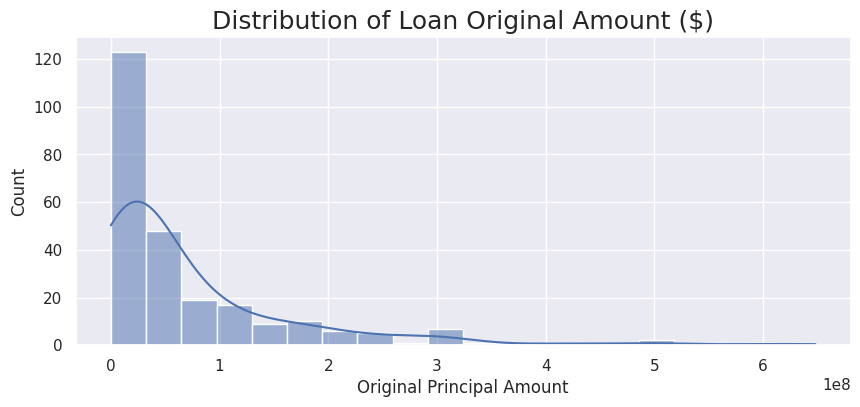

In [527]:
# Распределение по объему займа Original Principal Amount
plt.figure(figsize=(10, 4))
smpl = df_ibrd.sample(frac = 0.0002, random_state = 42)
sns.histplot(data = smpl, x = 'Original Principal Amount', bins = 20, kde = True)
plt.title('Distribution of Loan Original Amount ($)', fontsize=18)
plt.show()

### Plot

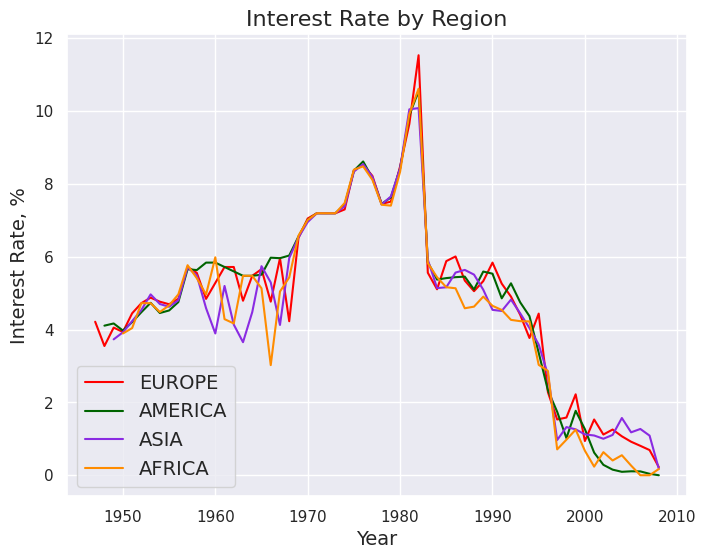

In [528]:
# Interest Rate by Region
data_year = df_fix.loc[df_fix['Year'] < 2009, ['Year', 'Interest Rate', 'MegaRegion', 'Original Principal Amount']].groupby(['Year', 'MegaRegion'], as_index=False).mean()

reglist = data_year.MegaRegion.unique().tolist()
clr = ['red', 'darkgreen', 'blueviolet', 'darkorange', 'blueviolet', 'navy', 'royalblue', 'darkslategrey', 'limegreen', 'orangere']

plt.figure(figsize=(8, 6))
for i in range(0, 4):
  x = data_year[data_year['MegaRegion'] == reglist[i]]['Year']
  y = data_year[data_year['MegaRegion'] == reglist[i]]['Interest Rate']
  plt.plot(x, y, label = reglist[i], color=clr[i])

plt.title('Interest Rate by Region', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Interest Rate, %', fontsize = 14)
plt.legend(loc = 'lower left', prop = {'size': 14})
plt.show()

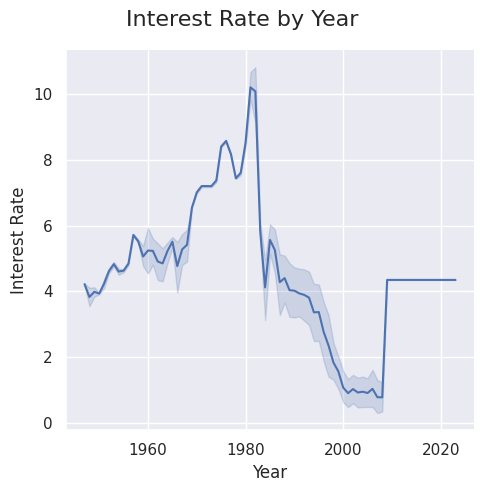

In [529]:
# Interest Rate by Region
data_year = df_fix.loc[:, ['Year', 'Interest Rate', 'MegaRegion', 'Loan Type', 'Original Principal Amount']].groupby(['Year', 'Loan Type', 'MegaRegion'], as_index=False).mean()
sns.relplot(
    data=data_year, x="Year", y="Interest Rate", kind="line",
)

plt.suptitle('Interest Rate by Year', fontsize = 16)
plt.subplots_adjust(top= 0.9)
plt.show()

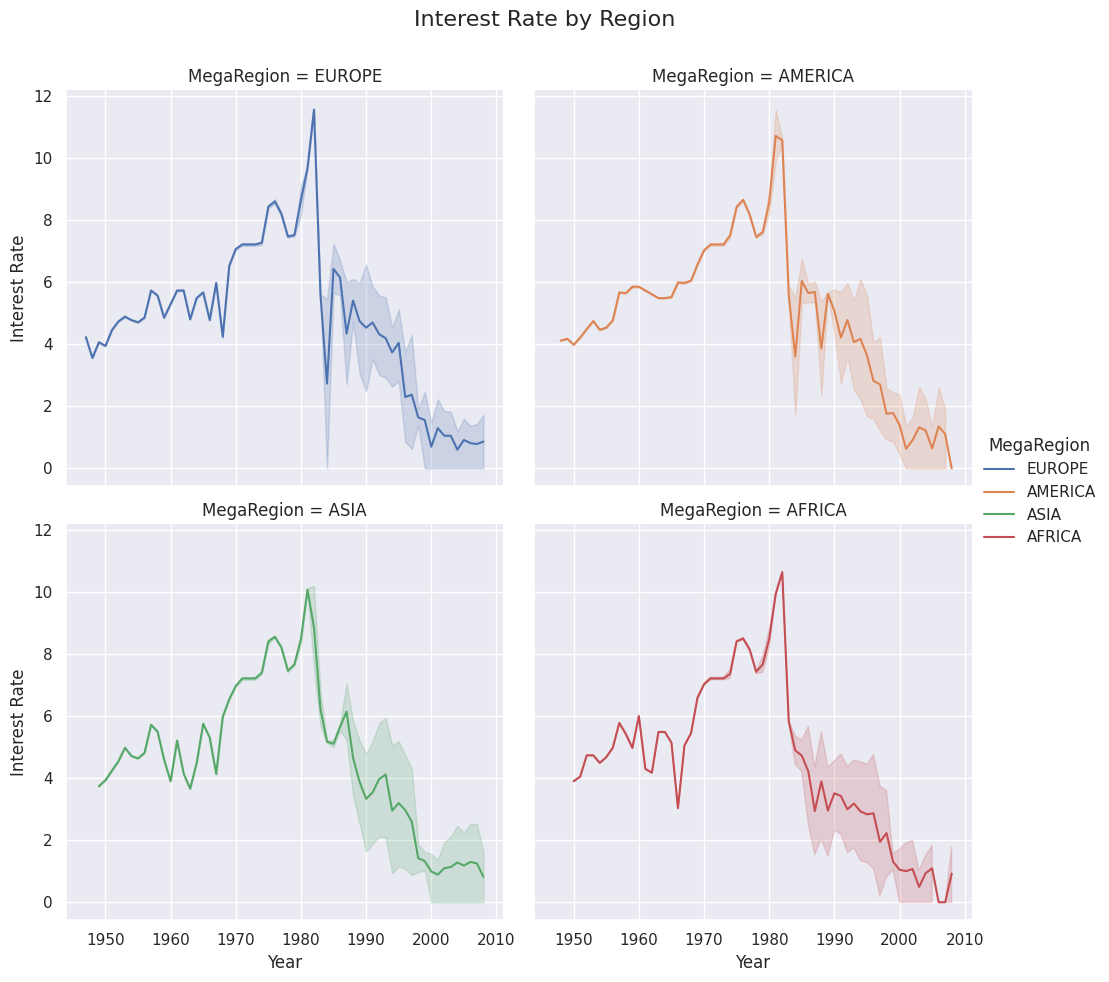

In [530]:
# Interest Rate by Region
data_year = df_fix.loc[df_fix['Year'] < 2009, ['Year', 'Interest Rate', 'MegaRegion', 'Loan Type', 'Original Principal Amount']].groupby(['Year', 'Loan Type', 'MegaRegion'], as_index=False).mean()
sns.relplot(
    data=data_year, x="Year", y="Interest Rate", col="MegaRegion",
    kind="line", hue="MegaRegion", col_wrap=2
)

plt.suptitle('Interest Rate by Region', fontsize = 16)
plt.subplots_adjust(top= 0.9)
plt.show()


### Scatter plots


Text(0.5, 1.0, 'Days vs. Interest Rate')

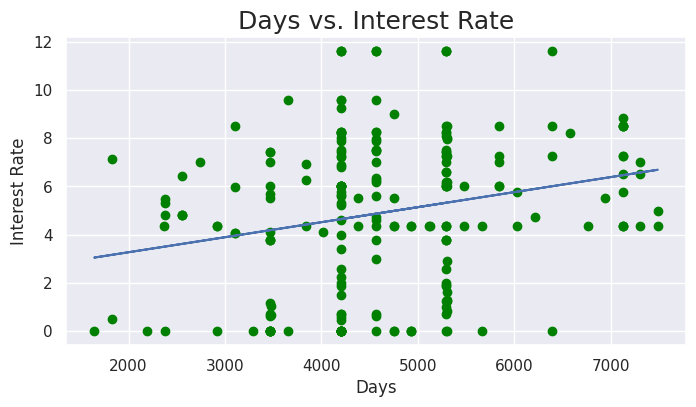

In [531]:
# Days / Interest Rate
plt.figure(figsize=(8, 4))
smpl = df_fix.sample(frac = 0.0002, random_state = 42) # используем df_fix
plt.scatter(smpl['Days'], smpl['Interest Rate'],  color='green')

# Добавим линию тренда
x = smpl['Days']
y = smpl['Interest Rate']
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)
plt.plot (x, p(x))

plt.xlabel('Days')
plt.ylabel('Interest Rate')
plt.title('Days vs. Interest Rate', fontsize=18)

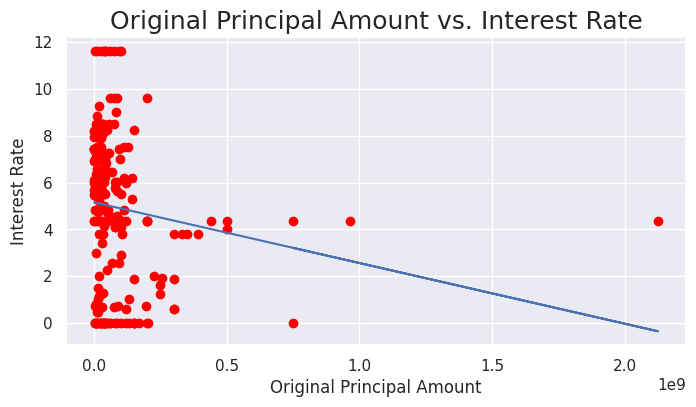

In [532]:
# Original Principal Amount / Interest Rate
plt.figure(figsize=(8, 4))
smpl = df_fix.sample(frac = 0.0002, random_state = 42)
plt.scatter(smpl['Original Principal Amount'], smpl['Interest Rate'],  color='red')

x = smpl['Original Principal Amount']
y = smpl['Interest Rate']
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)
plt.plot (x, p(x))

plt.xlabel('Original Principal Amount')
plt.ylabel('Interest Rate')
plt.title('Original Principal Amount vs. Interest Rate', fontsize=18);

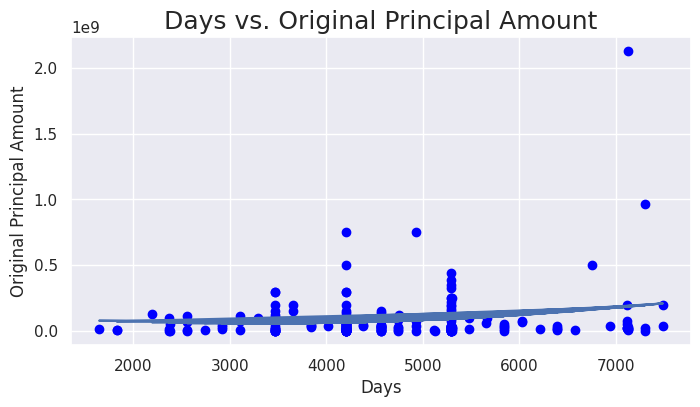

In [533]:
# Days / Original Principal Amount
plt.figure(figsize=(8, 4))
smpl = df_fix.sample(frac = 0.0002, random_state = 42)

plt.scatter(smpl['Days'], smpl['Original Principal Amount'],  color='blue')

x = smpl['Days']
y = smpl['Original Principal Amount']
z = np.polyfit (x, y, 2 )
p = np.poly1d (z)
plt.plot (x, p(x))

plt.xlabel('Days')
plt.ylabel('Original Principal Amount')
plt.title('Days vs. Original Principal Amount', fontsize=18);

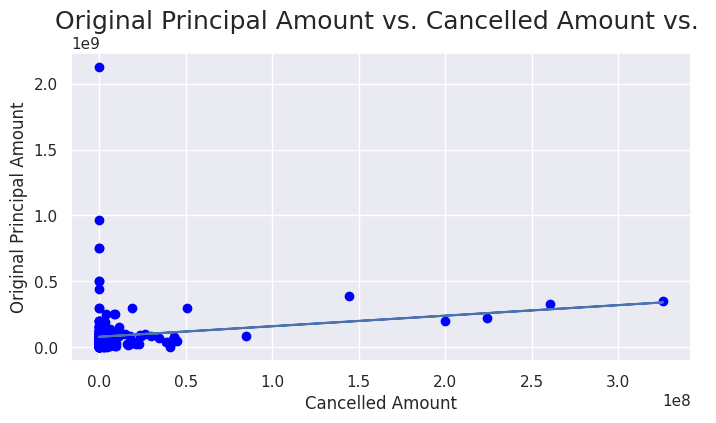

In [534]:
# Days / Original Principal Amount
plt.figure(figsize=(8, 4))
smpl = df_fix.sample(frac = 0.0002, random_state = 42)

plt.scatter(smpl['Cancelled Amount'], smpl['Original Principal Amount'],  color='blue')

x = smpl['Cancelled Amount']
y = smpl['Original Principal Amount']
z = np.polyfit (x, y, 1 )
p = np.poly1d (z)
plt.plot (x, p(x))

plt.xlabel('Cancelled Amount')
plt.ylabel('Original Principal Amount')
plt.title('Original Principal Amount vs. Cancelled Amount vs. ', fontsize=18);


### Correlation Matrix

In [535]:
# Построим корреляционную матрицу для некоторых полей
df_ibrd[['Year', 'Interest Rate', 'Original Principal Amount', 'Undisbursed Amount',
         'Cancelled Amount', 'Disbursed Amount', 'Due to IBRD', 'Days']].corr()

Year  Interest Rate  Original Principal Amount  \
Year                       1.000000      -0.491578                   0.331191   
Interest Rate             -0.491578       1.000000                  -0.171801   
Original Principal Amount  0.331191      -0.171801                   1.000000   
Undisbursed Amount         0.262703      -0.037519                   0.356392   
Cancelled Amount           0.088153      -0.085354                   0.309228   
Disbursed Amount           0.249989      -0.153040                   0.894211   
Due to IBRD                0.313354      -0.116352                   0.679722   
Days                       0.152615      -0.006502                   0.110351   

                           Undisbursed Amount  Cancelled Amount  \
Year                                 0.262703          0.088153   
Interest Rate                       -0.037519         -0.085354   
Original Principal Amount            0.356392          0.309228   
Undisbursed Amount                   1.000000         -0.020180   
Cancelled Amount                    -0.020180          1.000000   
Disbursed Amount                     0.033266          0.031160   
Due to IBRD                          0.107178         -0.001113   
Days                                 0.185377         -0.022870   

                           Disbursed Amount  Due to IBRD      Days  
Year                               0.249989     0.313354  0.152615  
Interest Rate                     -0.153040    -0.116352 -0.006502  
Original Principal Amount          0.894211     0.679722  0.110351  
Undisbursed Amount                 0.033266     0.107178  0.185377  
Cancelled Amount                   0.031160    -0.001113 -0.022870  
Disbursed Amount                   1.000000     0.736575  0.062714  
Due to IBRD                        0.736575     1.000000  0.162394  
Days                               0.062714     0.162394  1.000000

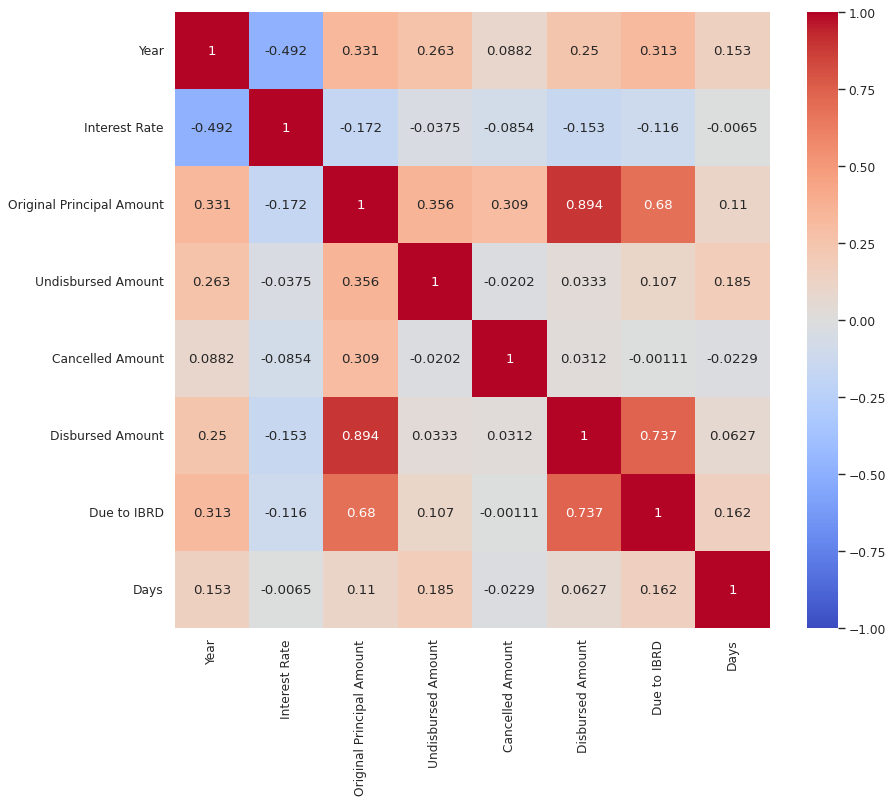

In [536]:
# Построим тепловую карту для матрицы sns.heatmap()
fig, ax = plt.subplots(figsize=(12,10), dpi= 80)
sns.heatmap(df_ibrd[['Year', 'Interest Rate', 'Original Principal Amount', 'Undisbursed Amount',
                     'Cancelled Amount', 'Disbursed Amount', 'Due to IBRD', 'Days']].corr(),
            cmap= 'coolwarm',
            vmin = -1, vmax = 1,
            annot = True, fmt = '.3g',
            linewidths=0, linecolor='black');

In [537]:
# Матрица корреляции числа сделок в разрезе  'Loan Status' v. 'Loan Type'
table_StatusType = df_ibrd.pivot_table(
    values=['Number of loan deals'],
    index='Loan Status',
    columns='Loan Type',
    aggfunc={'Number of loan deals': 'sum'}
)
table_StatusType.round(2)

Number of loan deals                                     \
Loan Type                           BLNC    BLNR   BLOAN       CPL      FSL   
Loan Status                                                                   
Approved                             NaN     NaN   134.0       NaN   6481.0   
Cancelled                            NaN     NaN  1901.0       NaN    782.0   
Disbursed                            NaN     NaN     NaN       NaN  36239.0   
Disbursing                           NaN     NaN     NaN       NaN  75837.0   
Disbursing&Repaying                  NaN     NaN     NaN       3.0  10949.0   
Effective                            NaN     NaN   641.0       NaN   2778.0   
Fully Cancelled                    120.0     NaN    54.0    4740.0   1541.0   
Fully Disbursed                      NaN     NaN     NaN       NaN  22967.0   
Fully Repaid                         NaN  1080.0   486.0  122073.0  22677.0   
Fully Transferred                    NaN     NaN     NaN   12600.0      NaN   
Repaid                               NaN     NaN  1170.0       NaN   5287.0   
Repaying                             NaN     NaN     NaN    1284.0  62861.0   
Signed                               NaN     NaN    27.0       NaN   4194.0   
Terminated                           NaN     NaN   173.0       NaN   4908.0   

                                                                            \
Loan Type             GUBF    GURB Guarantee  NON POOL       NPL POOL LOAN   
Loan Status                                                                  
Approved               7.0   360.0      25.0       NaN       NaN       NaN   
Cancelled              NaN     NaN       NaN    2899.0       NaN    5202.0   
Disbursed              NaN     NaN       NaN       NaN       NaN    6446.0   
Disbursing             NaN     NaN       NaN       NaN       NaN     175.0   
Disbursing&Repaying    NaN     NaN       NaN       NaN       NaN       NaN   
Effective              NaN  1337.0       NaN       NaN       NaN       NaN   
Fully Cancelled        NaN  3106.0       NaN    1188.0    2640.0    2133.0   
Fully Disbursed        NaN     NaN       NaN       NaN       NaN       NaN   
Fully Repaid           NaN     NaN       NaN   53163.0  118140.0   54892.0   
Fully Transferred      NaN     NaN       NaN       NaN       NaN    5670.0   
Repaid                 NaN     NaN       NaN  129940.0       NaN  142371.0   
Repaying               NaN     NaN       NaN       NaN       NaN     620.0   
Signed               219.0    36.0      29.0       NaN       NaN       NaN   
Terminated            54.0   564.0       NaN       NaN       NaN       NaN   

                                                                          \
Loan Type                SCL  SCP EUR SCP JPY  SCP USD     SCPD     SCPM   
Loan Status                                                                
Approved                 NaN      NaN     NaN      NaN      NaN      NaN   
Cancelled                NaN      NaN     NaN      NaN      NaN      NaN   
Disbursed                NaN    924.0     NaN   3279.0      NaN      NaN   
Disbursing              60.0      NaN     NaN      NaN      NaN      NaN   
Disbursing&Repaying    220.0      NaN     NaN      NaN      NaN      NaN   
Effective                NaN      NaN     NaN      NaN      NaN      NaN   
Fully Cancelled       1740.0      NaN     NaN      NaN      NaN      NaN   
Fully Disbursed          NaN      NaN     NaN      NaN      NaN      NaN   
Fully Repaid         59906.0   4638.0   351.0  18654.0  41411.0  10303.0   
Fully Transferred        NaN      NaN     NaN      NaN      NaN      NaN   
Repaid                   NaN  10391.0   855.0  42123.0      NaN      NaN   
Repaying             12654.0      6.0     NaN      3.0     49.0     17.0   
Signed                   NaN      NaN     NaN      NaN      NaN      NaN   
Terminated             720.0      NaN     NaN      NaN      NaN      NaN   

                                       
Loan Type       

In [538]:
# print(df_ibrd['Loan Type'].unique())
# print(df_ibrd['Loan Status'].unique())

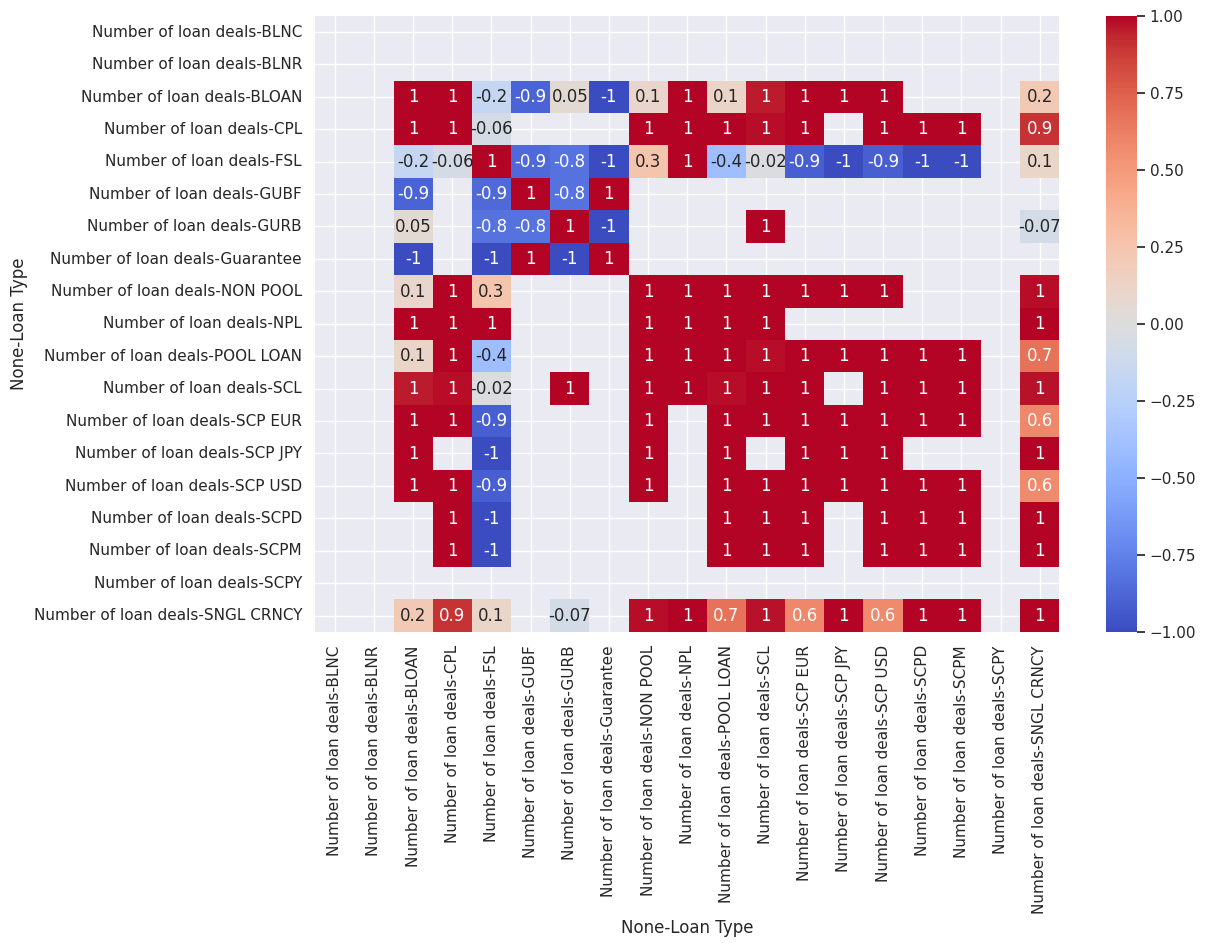

In [539]:
# Построим корреляционную матрицу в функцию sns.heatmap()
# fig, ax = plt.subplots(figsize=(12,10), dpi= 80)
sns.heatmap(table_StatusType.corr(),
            cmap= 'coolwarm',
            vmin = -1, vmax = 1,
            annot = True, fmt = '.1g',
            linewidths=0, linecolor='black');

### BarPlots

In [540]:
data_decade = df_ibrd.loc[:, ['Decade', 'Period', 'Number of loan deals', 'Original Principal Amount']].groupby(['Decade'], as_index=False).sum()
# data_decade = data.sort_values(by='Decade', ascending=True)

<ipython-input-540-3b244bbc8f51>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_decade = df_ibrd.loc[:, ['Decade', 'Period', 'Number of loan deals', 'Original Principal Amount']].groupby(['Decade'], as_index=False).sum()


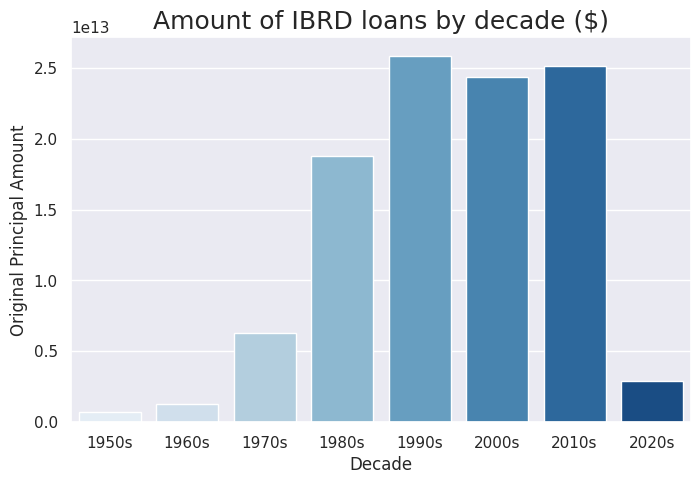

In [541]:
# Объем займов МБРР по декадам ($)
# Visualization 1
plt.figure(figsize=(8, 5))
sns.barplot(x='Decade', y='Original Principal Amount', palette='Blues', data=data_decade)
plt.title("Amount of IBRD loans by decade ($)", fontsize=18)
plt.show()

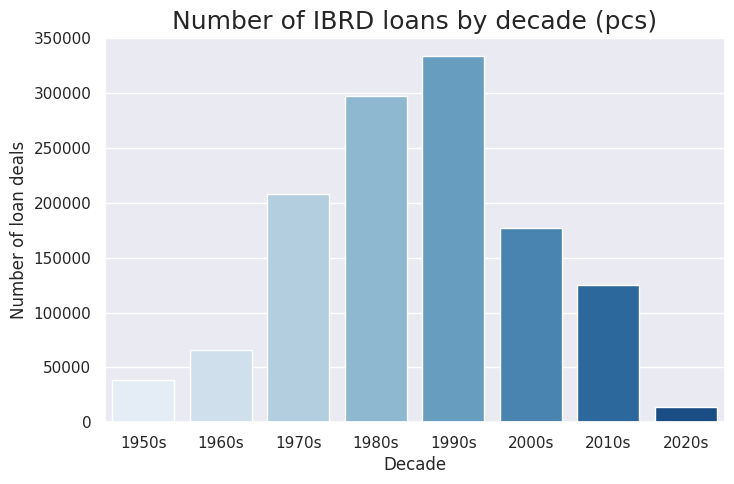

In [542]:
# Visualization 2
plt.figure(figsize=(8, 5))
sns.barplot(x='Decade', y='Number of loan deals', palette='Blues', data=data_decade)
plt.title("Number of IBRD loans by decade (pcs)", fontsize=18)
plt.show()

In [543]:
data_prd = df_ibrd.loc[:, ['Period', 'MegaRegion', 'Number of loan deals', 'Original Principal Amount', 'Disbursed Amount', 'Undisbursed Amount']]
# data_prd.head()

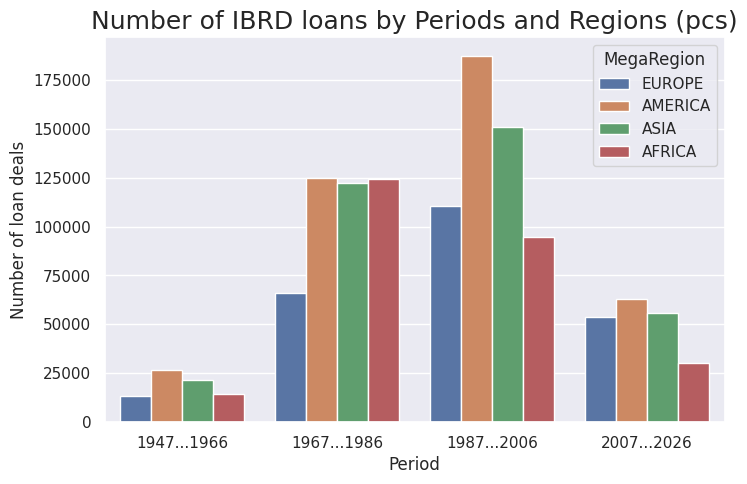

In [544]:
# Visualization 3
plt.figure(figsize=(8, 5))
sns.barplot(data_prd, x='Period', y='Number of loan deals', hue='MegaRegion', estimator='sum')
plt.title("Number of IBRD loans by Periods and Regions (pcs)", fontsize=18)
plt.show()

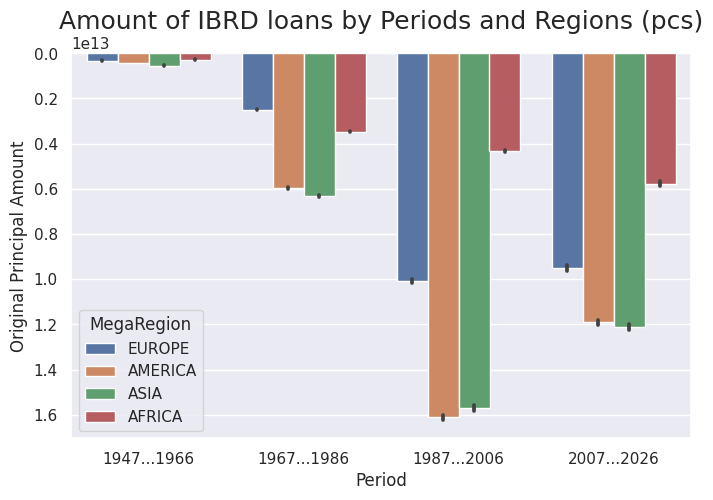

In [545]:
# Visualization 4 - invert_yaxis
plt.figure(figsize=(8, 5))
sns.barplot(data_prd, x='Period', y='Original Principal Amount', hue='MegaRegion', estimator='sum')
plt.title("Amount of IBRD loans by Periods and Regions (pcs)", fontsize=18)
plt.gca().invert_yaxis()
plt.show()

Крупнейшие страны-заемщики МБРР

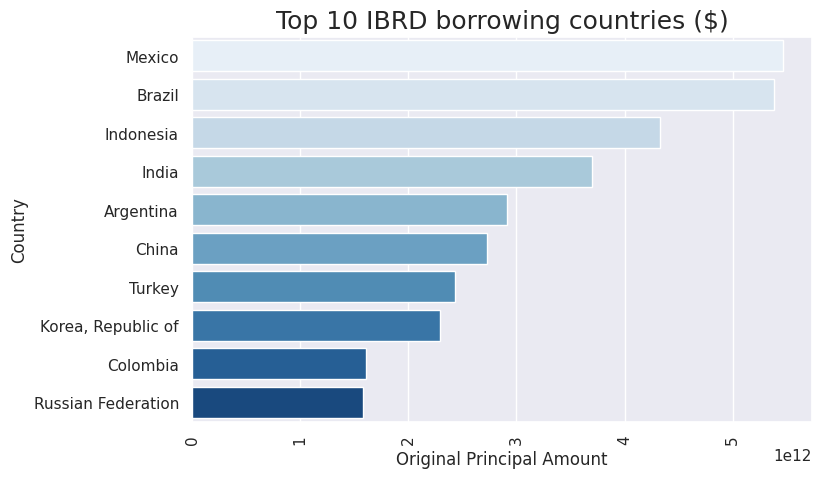

In [573]:
# Топ-10 стран-заемщиков МБРР
data = df_ibrd.loc[(df_ibrd['Loan Status'] == 'Fully Repaid') | (df_ibrd['Loan Status'] == 'Repaid'),['Country', 'Number of loan deals', 'Original Principal Amount']].groupby(['Country'], as_index=False).sum()
data_10_country = data.sort_values(by='Original Principal Amount', ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x='Original Principal Amount', y='Country',  orient='h', palette='Blues',data=data_10_country)
plt.xticks(rotation=90)
plt.title("Top 10 IBRD borrowing countries ($)", fontsize=18)
plt.show()

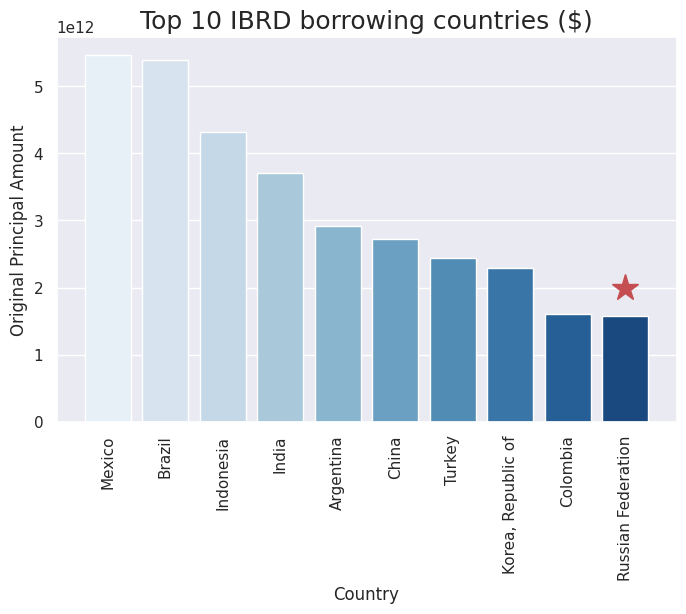

In [547]:
# Топ-10 стран-заемщиков МБРР
# Крупнейшие страны-заемщики МБРР по выплаченным займам
data = df_ibrd.loc[(df_ibrd['Loan Status'] == 'Fully Repaid') | (df_ibrd['Loan Status'] == 'Repaid'),['Country', 'Number of loan deals', 'Original Principal Amount']].groupby(['Country'], as_index=False).sum()
data_10_country = data.sort_values(by='Original Principal Amount', ascending=False).head(10)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Country', y='Original Principal Amount', palette='Blues',data=data_10_country)
ax.plot(9, 2*10**12, "*", markersize=20, color="r")
plt.xticks(rotation=90)
plt.title("Top 10 IBRD borrowing countries ($)", fontsize=18)
plt.show()

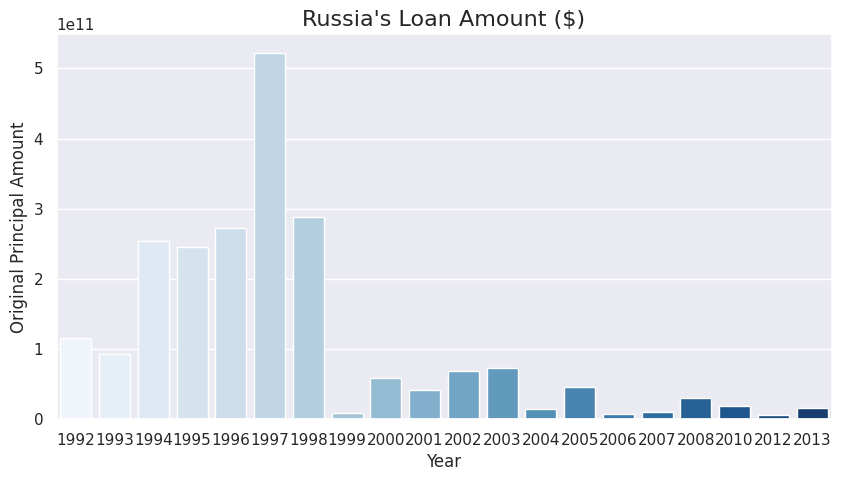

In [548]:
# Динамика займов России
df_rus = data_russia.loc[(data_russia['Year'] > 1970), ['Year', 'Original Principal Amount']]
df_rus = df_rus.groupby(['Year'], as_index=False).sum().sort_values(by='Year', ascending=True)
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Original Principal Amount', palette='Blues', data=df_rus)
plt.title("Russia's Loan Amount ($)", fontsize=16)
plt.show()

### BarPlots - Matplotlib

Loan Amount by Period

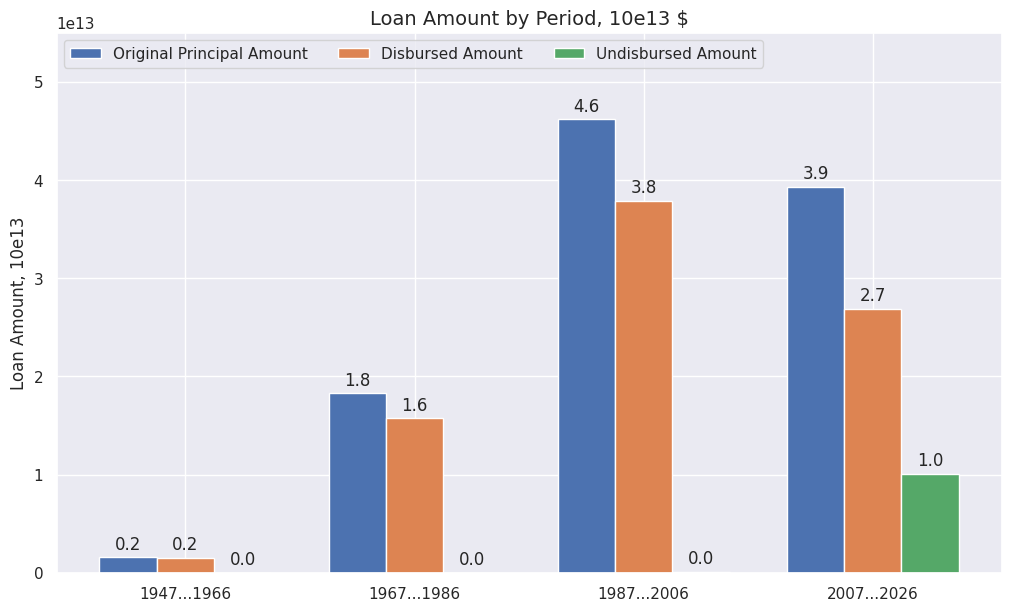

In [549]:
# Loan Amount by Period ($)
data_prd = df_ibrd.loc[:, ['Period', 'Original Principal Amount', 'Disbursed Amount', 'Undisbursed Amount']].groupby(['Period'], as_index=True).sum()

period = ("1947...1966", "1967...1986", "1987...2006", "2007...2026")
x = np.arange(len(period))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10,6))
for attribute, measurement in data_prd.items():
    # print(attribute, measurement)
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt=lambda x: f'{x / 10**13 :.1f}') # формат подписи данных
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Loan Amount, 10e13', fontsize=12)
ax.set_title('Loan Amount by Period, 10e13 $', fontsize=14)
ax.set_xticks(x + width, period)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 55*10**12)

plt.show()

### Boxplots

Loan Amount by Period & MegaRegion

Loan Duration by Decade (days)

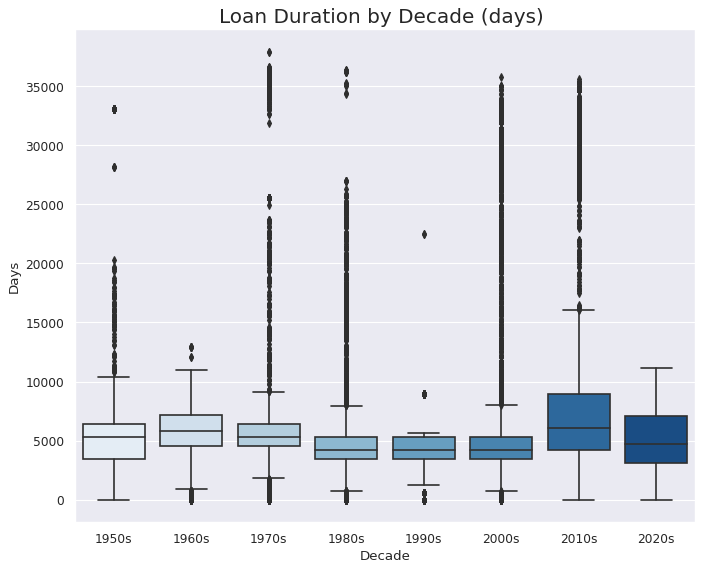

In [550]:
# Box Plot of Duration by Decade
data_year_day = df_ibrd.loc[:,['Decade','Days']]
# Duration by Decade
plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot(x=data_year_day['Decade'], y=data_year_day['Days'], data = data_year_day, palette="Blues", notch=False)
plt.title('Loan Duration by Decade (days) ', fontsize=18)
plt.show()

Колонка 'Days' содержит большое количество выбросов.

Применим 1,5IQR и удалим выбросы в колонке.

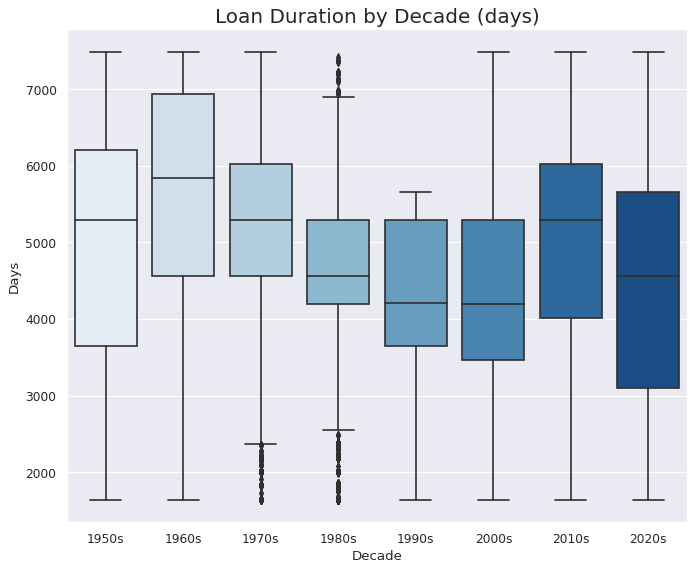

In [551]:
# Box Plot of Duration by Decade - Используем очищенный датафрейм df_fix
plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot(x=df_fix['Decade'], y=df_fix['Days'], data = df_fix, palette="Blues", notch=False)
plt.title('Loan Duration by Decade (days)', fontsize=18)
plt.show()

Interest Rates by Decade

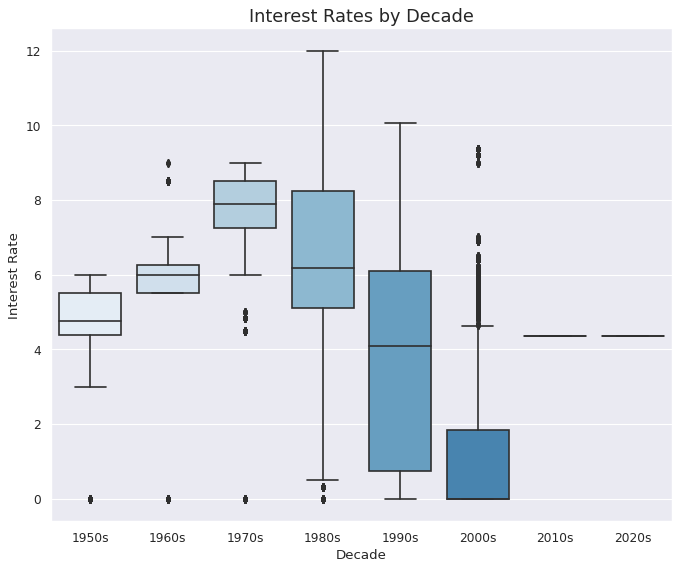

In [553]:
# Box Plot of Interest Rates by Decade
data = df_ibrd.loc[:,['Decade','Interest Rate']].groupby(['Decade'], as_index=False).mean()
data_year_rate = data.sort_values(by='Decade', ascending=True)

# Interest Rates by Decade
plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot(x=df_ibrd['Decade'], y=df_ibrd['Interest Rate'], data=data_year_rate, palette="Blues", notch=False)
plt.title('Interest Rates by Decade', fontsize=16)
plt.show()

Interest Rates by MegaRegions

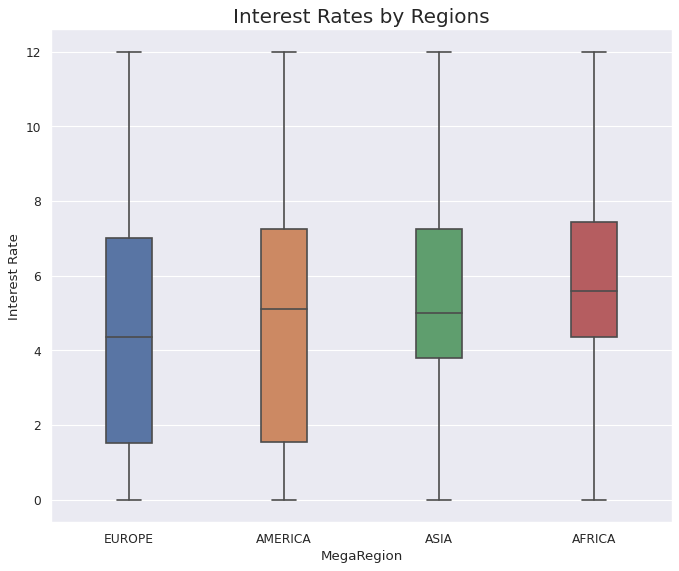

In [554]:
# Interest Rates by MegaRegions: Африка кредитуется дороже всех
rate = df_ibrd.loc[:, ['MegaRegion', 'Interest Rate']]
plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot( x=rate['MegaRegion'], y=rate['Interest Rate'], width=0.3);
plt.title('Interest Rates by Regions', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Loan Duration by Regions')

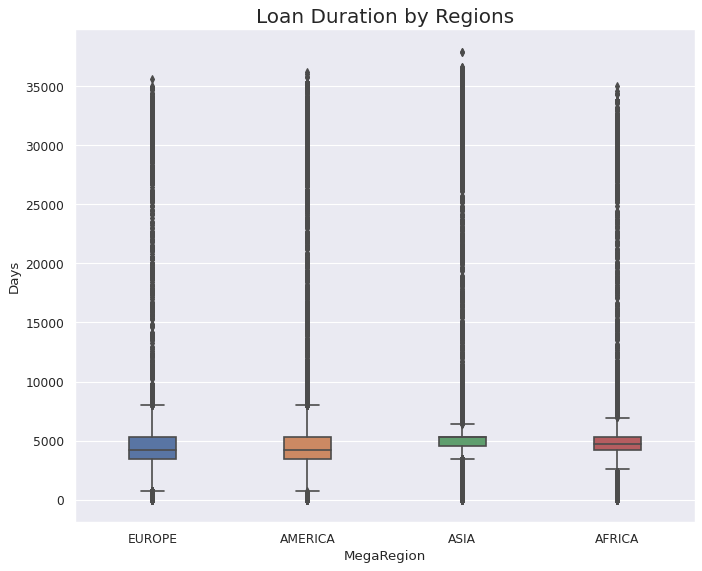

In [555]:
# Box Plot of Days by MegaRegions: присутствует значительное количество выбросов
rate = df_ibrd.loc[:, ['MegaRegion', 'Days']]
plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot( x=rate['MegaRegion'], y=rate['Days'], width=0.3);
plt.title('Loan Duration by Regions', fontsize=18)
# plt.show()

Text(0.5, 1.0, 'Loan Duration by Regions')

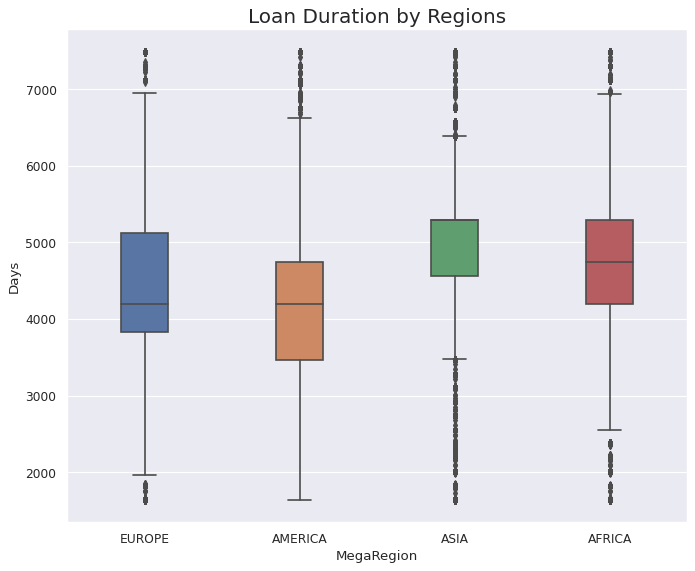

In [556]:
# Box Plot of Days by MegaRegions: удалим выбросы (используем df_fix)
plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot( x=df_fix['MegaRegion'], y=df_fix['Days'], width=0.3);
plt.title('Loan Duration by Regions', fontsize=18)
# plt.show()

Stripplot

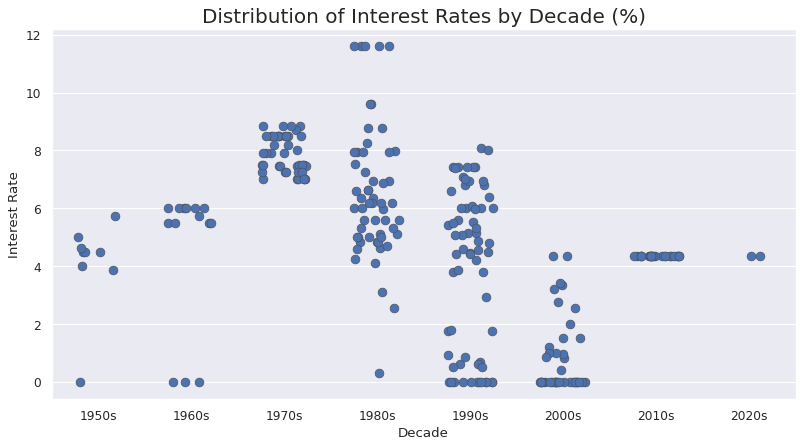

In [557]:
# Distribution of Interest Rates by Decade
fig, ax = plt.subplots(figsize=(12,6), dpi= 80)
sns.stripplot(x=df_ibrd['Decade'], y=df_ibrd['Interest Rate'].sample(frac = 0.0002, random_state = 42), jitter=0.25, size=8, ax=ax, linewidth=.5)
# Decorations
plt.title('Distribution of Interest Rates by Decade (%)', fontsize=18)
plt.show()

Violinplot

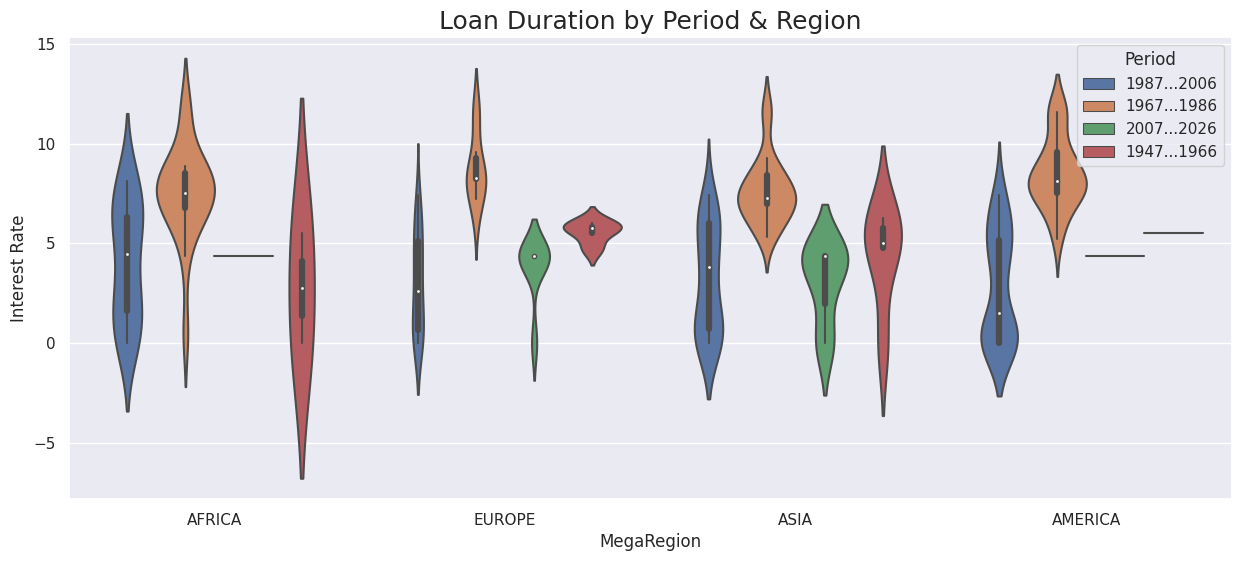

In [558]:
# Loan Duration by Period & Region
fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(data=df_fix.sample(frac = 0.0002, random_state = 42), x="MegaRegion", y="Interest Rate", hue="Period")
# sns.stripplot(x=df_fix['MegaRegion'], y=df_fix['Days'].sample(frac = 0.0002, random_state = 42), jitter=0.25, size=8, ax=ax, linewidth=.5)
# Decorations
plt.title('Loan Duration by Period & Region', fontsize=18)
plt.show()

# Задача 2. Визуализация и DashBoard

### Таблицы

In [559]:
table_Decade

In [560]:
table_Region

In [561]:
table_rate

In [562]:
table_LoanStatus

In [563]:
data_top10_country_tot

In [564]:
table_Top10Project

### Мультиокна

Loan Amount by Period & MegaRegion

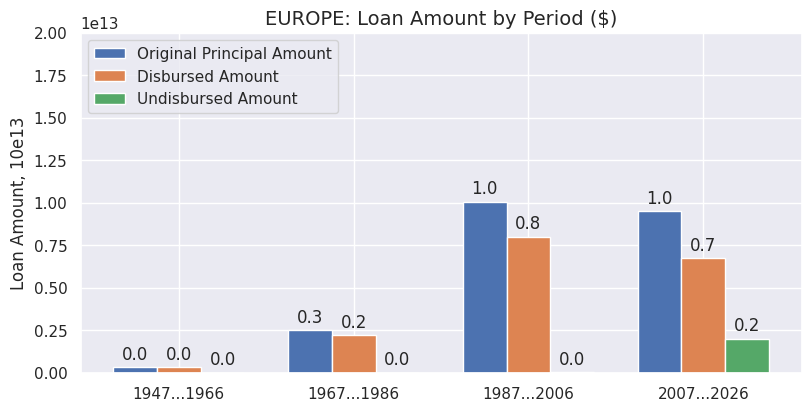

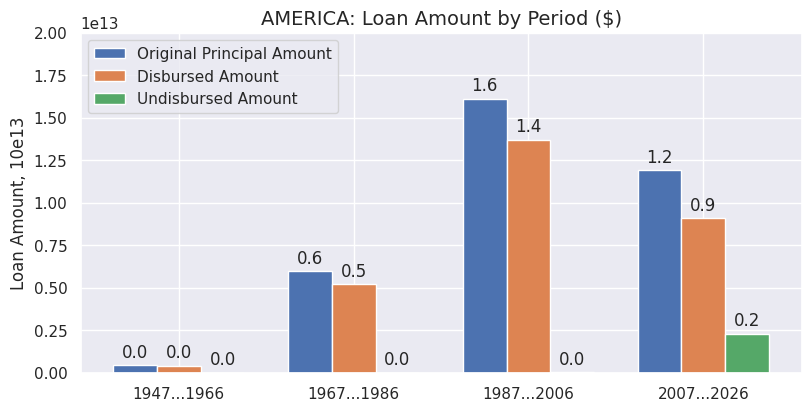

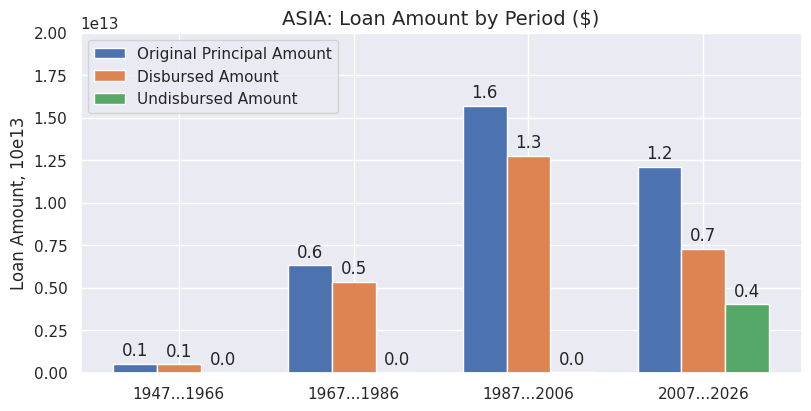

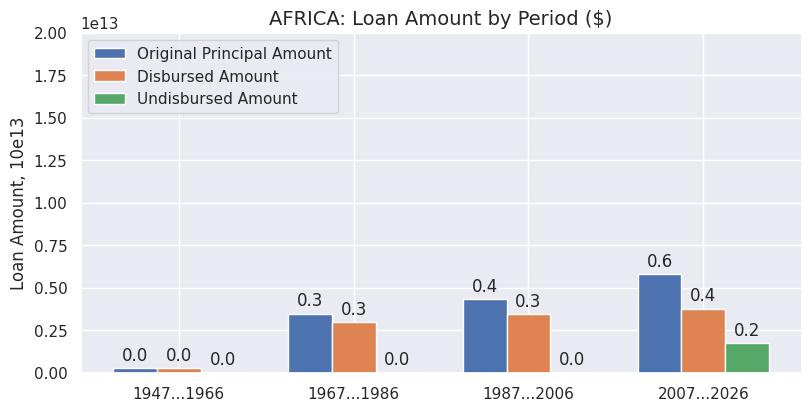

In [565]:
# Loan Amount by Period & MegaRegion
reglist = ['EUROPE', 'AMERICA', 'ASIA', 'AFRICA']
period = ("1947...1966", "1967...1986", "1987...2006", "2007...2026")

x = np.arange(len(period))  # the label locations
width = 0.25  # the width of the bars

for reg in reglist:
  multiplier = 0
  df_preg = df_ibrd.loc[df_ibrd['MegaRegion'] == reg, ['Period', 'Original Principal Amount', 'Disbursed Amount', 'Undisbursed Amount']].groupby(['Period'], as_index=True).sum()
  fig, ax = plt.subplots(layout='constrained', figsize=(8,4))
  for attribute, measurement in df_preg.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=3, fmt=lambda x: f'{x / 10**13 :.1f}') # формат подписи данных
      multiplier += 1
    # add some text for labels, title and custom x-axis tick labels, etc.
      ax.set_ylabel('Loan Amount, 10e13', fontsize=12)
      ax.set_title(f'{reg}: Loan Amount by Period ($)', fontsize=14)
      ax.set_xticks(x + width, period)
      ax.legend(loc='upper left')
      ax.set_ylim(0, 20*10**12)
plt.show()

Basic Two-Dimensional Plots: Days-Rate, Amount-Rate, Days-Amount, Amount-Amount

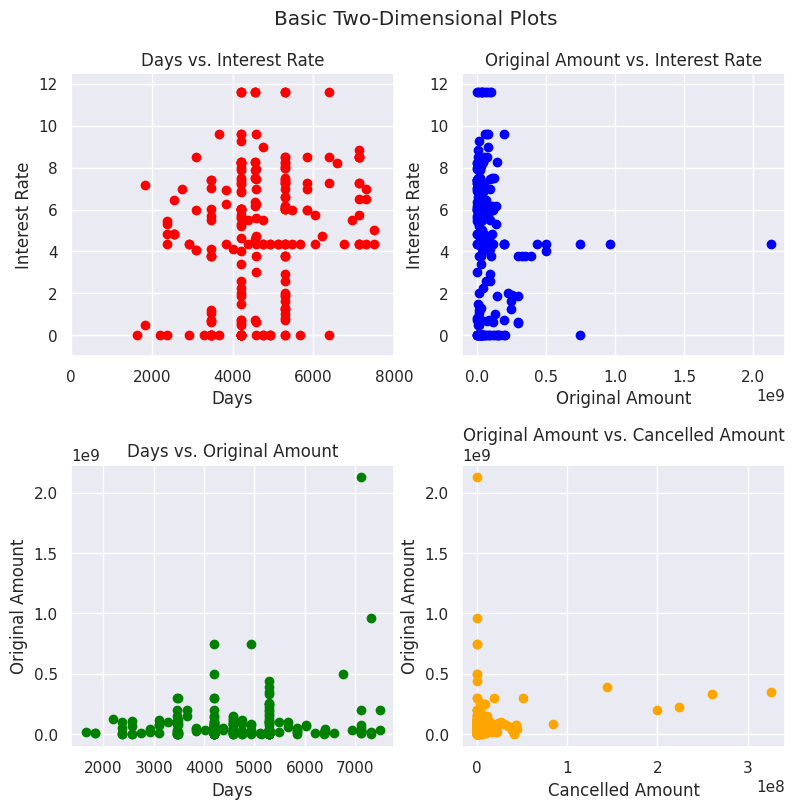

In [566]:
#define sample
smpl = df_fix.sample(frac = 0.0002, random_state = 42)
#define figure
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
fig.tight_layout(h_pad = 5)
fig.suptitle('Basic Two-Dimensional Plots')
plt.subplots_adjust(top= 0.9 )
# 1
ax[0, 0].scatter(smpl['Days'], smpl['Interest Rate'], color='red')
ax[0, 0].set(title = 'Days vs. Interest Rate',
             xlabel = 'Days', ylabel = 'Interest Rate',
             xlim = (0, 8000), ylim = (-1, 12.5)
             )
# 2
ax[0, 1].scatter(smpl['Original Principal Amount'], smpl['Interest Rate'], color='blue')
ax[0, 1].set(title = 'Original Amount vs. Interest Rate',
             xlabel = 'Original Amount', ylabel = 'Interest Rate',
             ylim = (-1, 12.5) # xlim = (0, 10000000)
             )
# 3
ax[1, 0].scatter(smpl['Days'], smpl['Original Principal Amount'], color='green')
ax[1, 0].set(title = 'Days vs. Original Amount',
             xlabel = 'Days', ylabel = 'Original Amount',
            #  xlim = (0, 8000), ylim = (-1, 12.5)
             )
# 4
ax[1, 1].scatter(smpl['Cancelled Amount'], smpl['Original Principal Amount'], color='Orange')
ax[1, 1].set(title = 'Original Amount vs. Cancelled Amount',
             xlabel = 'Cancelled Amount', ylabel = 'Original Amount',
            #  xlim = (0, 8000), ylim = (-1, 12.5)
             )
plt.show()

RelPlots: Original Amount Dynamics by Region

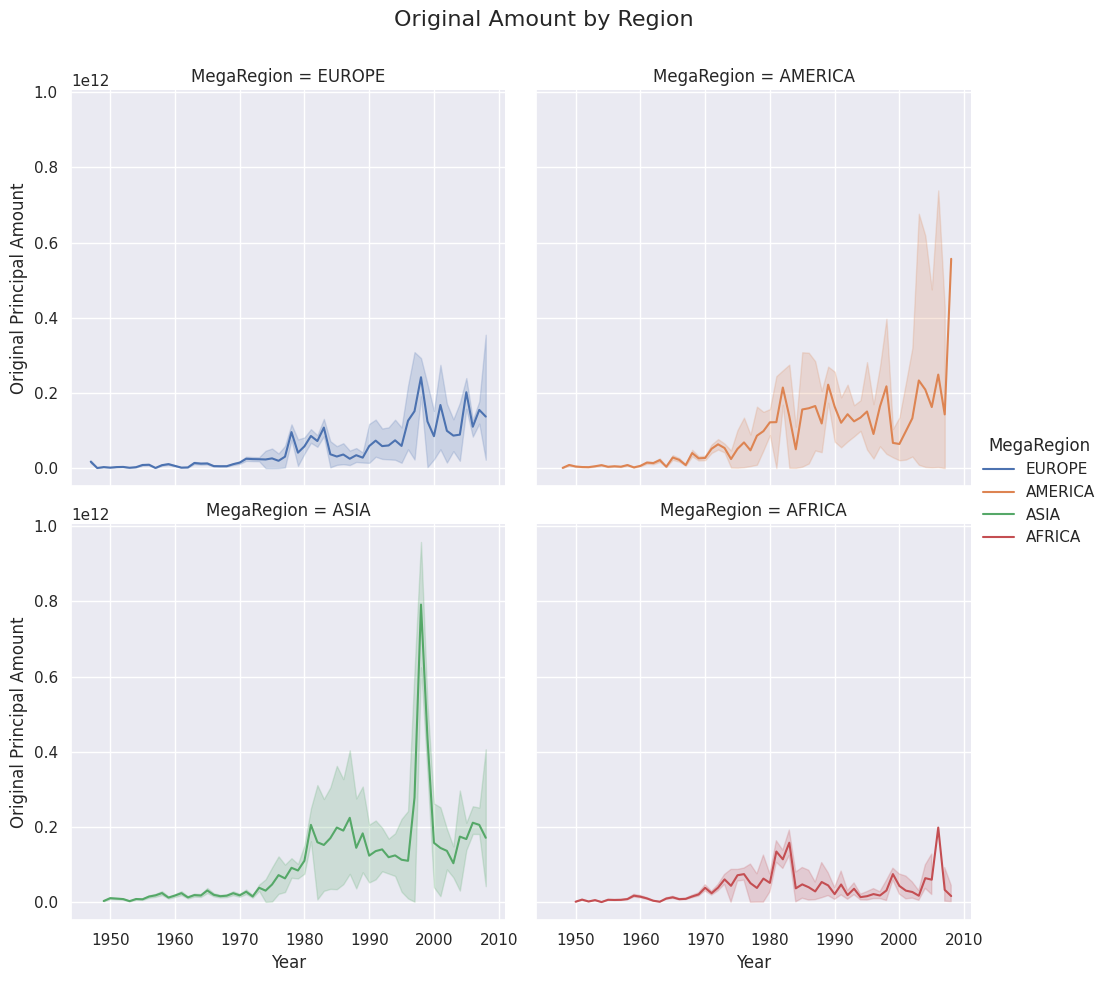

In [567]:
# Original Amount by Region
data_year = df_fix.loc[df_fix['Year'] < 2009, ['Year', 'Interest Rate', 'MegaRegion', 'Loan Type', 'Original Principal Amount']].groupby(['Year', 'Loan Type', 'MegaRegion'], as_index=False).sum()
sns.relplot(
    data=data_year, x="Year", y="Original Principal Amount", col="MegaRegion",
    kind="line", hue="MegaRegion", col_wrap=2
)
plt.suptitle('Original Amount by Region', fontsize = 16)
plt.subplots_adjust(top= 0.9)
plt.show()

FacetGrid: Rate & Days by Loan Type

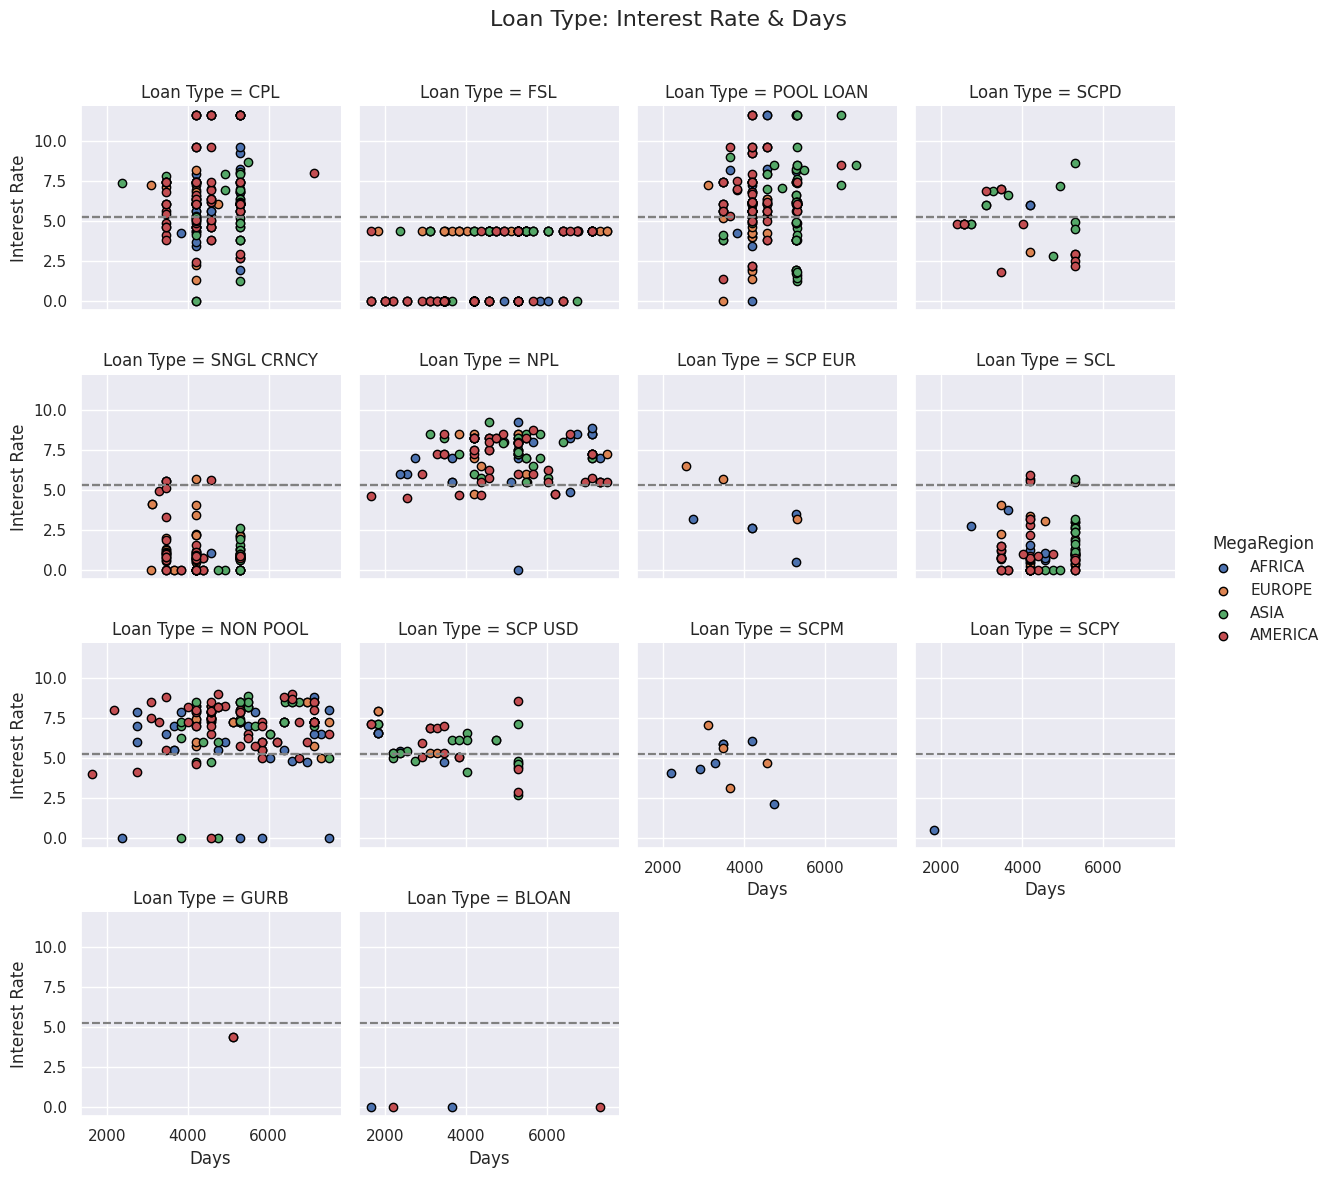

In [568]:
# Loan Type: Interest Rate & Days
smpl = df_fix.sample(frac = 0.001, random_state = 42)

g = sns.FacetGrid(smpl,  hue='MegaRegion', col='Loan Type',
                  margin_titles=True,  col_wrap=4
                  )
g=g.map(plt.scatter, 'Days', 'Interest Rate', edgecolor="black").add_legend();
# g.set_titles('{col_name}', fontsize=16)
g.refline(y=smpl['Interest Rate'].median())
g.tight_layout()
g.set_axis_labels('Days', 'Interest Rate')

plt.suptitle('Loan Type: Interest Rate & Days', fontsize = 16)
plt.subplots_adjust(top=0.9)
plt.show()

FacetGrid: Interest Rate Dynamics by Loan Type

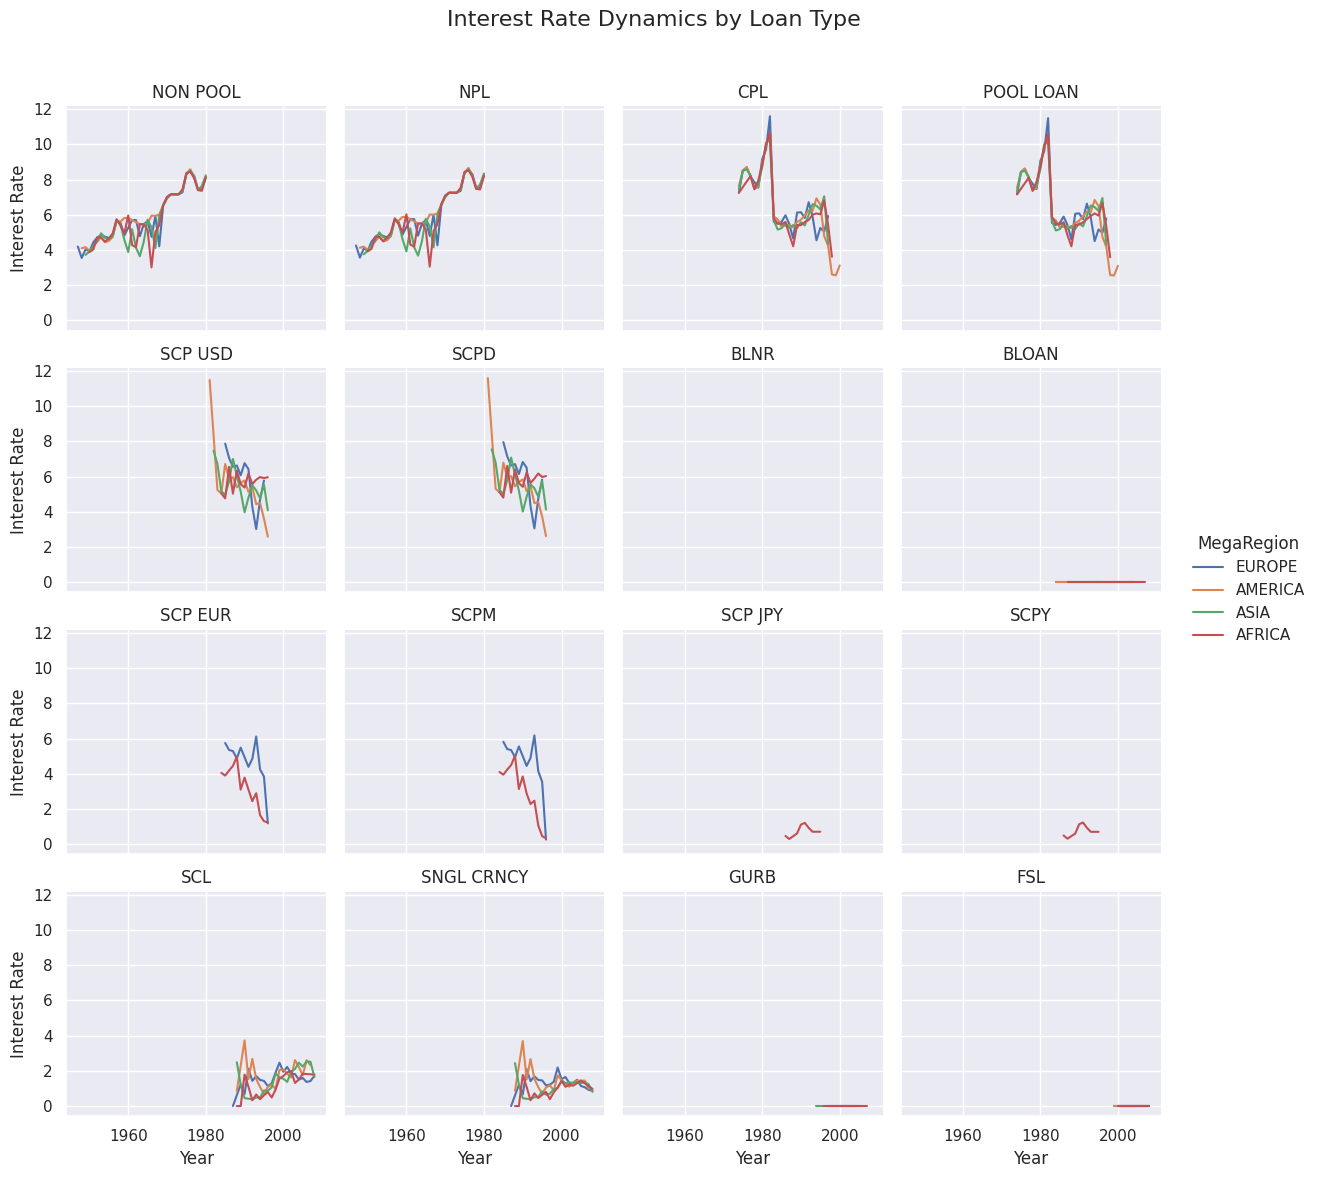

In [569]:
data_year = df_fix.loc[df_fix['Year'] < 2009, ['Year', 'Interest Rate', 'MegaRegion', 'Loan Type', 'Original Principal Amount']].groupby(['Year', 'Loan Type', 'MegaRegion'], as_index=False).mean()

g = sns.FacetGrid(data_year,  hue='MegaRegion', col='Loan Type',
                  margin_titles=True,  col_wrap=4
                  )
g=g.map(plt.plot, 'Year', 'Interest Rate').add_legend()
g.set_titles('{col_name}', fontsize=16)
# g.refline(y=smpl['Days'].median())
g.tight_layout()
plt.suptitle('Interest Rate Dynamics by Loan Type', fontsize = 16)
plt.subplots_adjust(top=0.9)
plt.show()

FacetGrid: Disbursed Amount & Original Amount by Loan Status

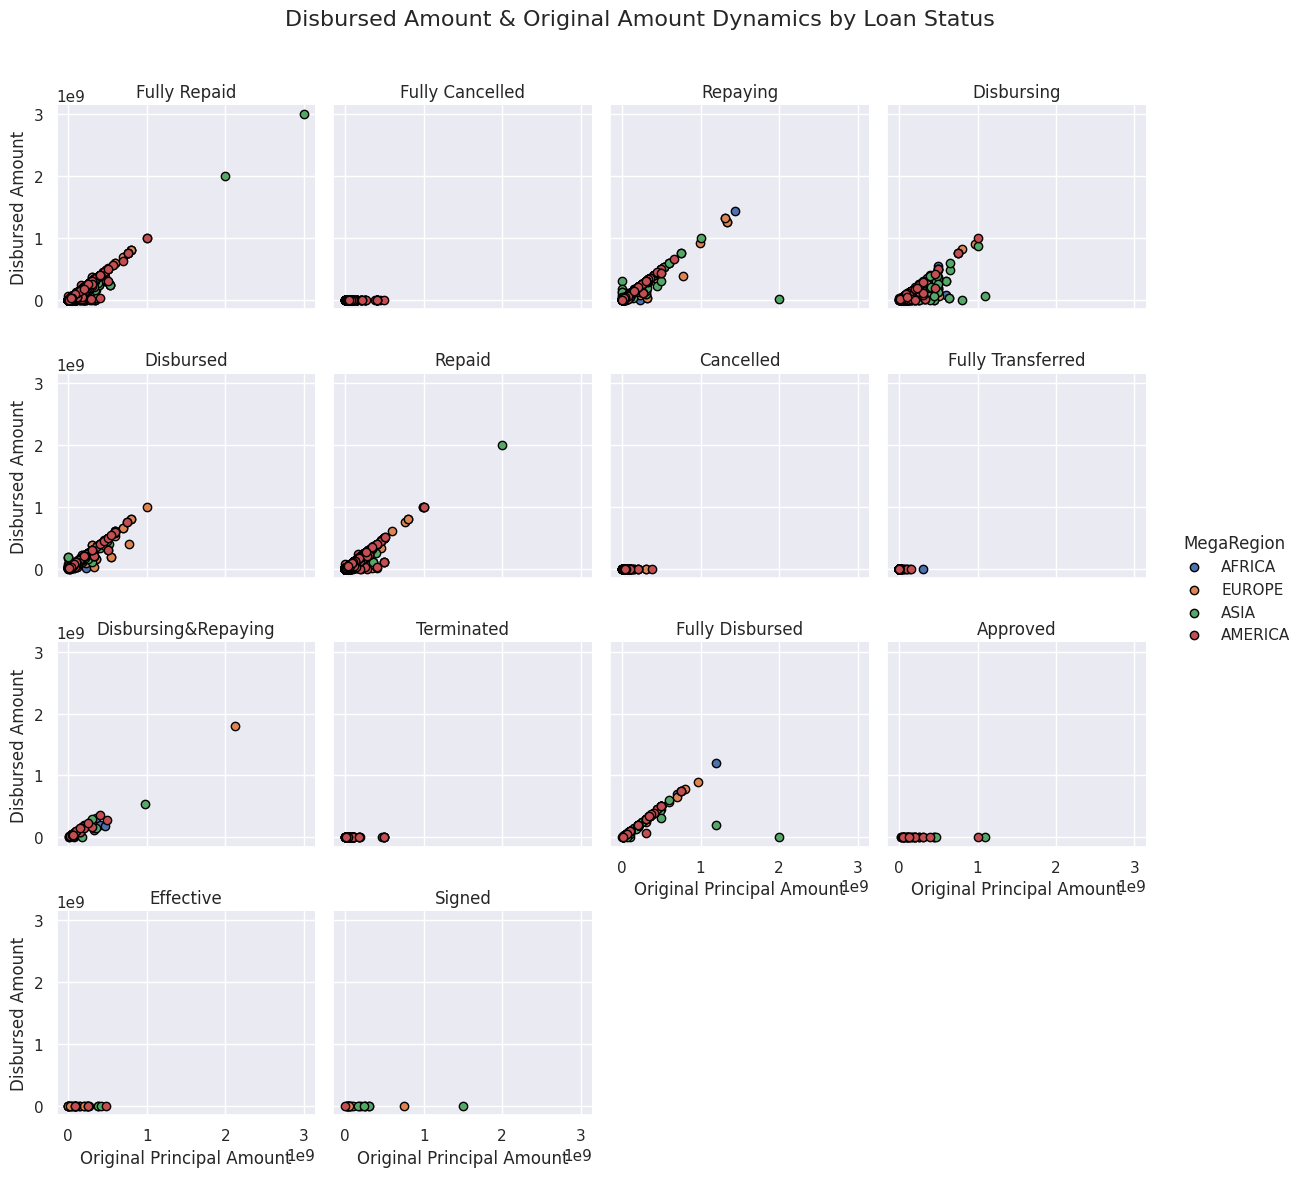

In [570]:
# Loan Status: Disbursed Amount & Original Amount
smpl = df_fix.sample(frac = 0.01, random_state = 42)

g = sns.FacetGrid(smpl,  hue='MegaRegion', col='Loan Status',
                  margin_titles=True,  col_wrap=4
                  )
g=g.map(plt.scatter, 'Original Principal Amount', 'Disbursed Amount',  edgecolor="black").add_legend();
g.set_titles('{col_name}', fontsize=16)
# g.refline(y=smpl['Days'].median())
g.tight_layout()

plt.suptitle('Disbursed Amount & Original Amount Dynamics by Loan Status', fontsize = 16)
plt.subplots_adjust(top=0.9)
plt.show()

## DashBoard

### DashBoard 1: Volume of IBRD Loans

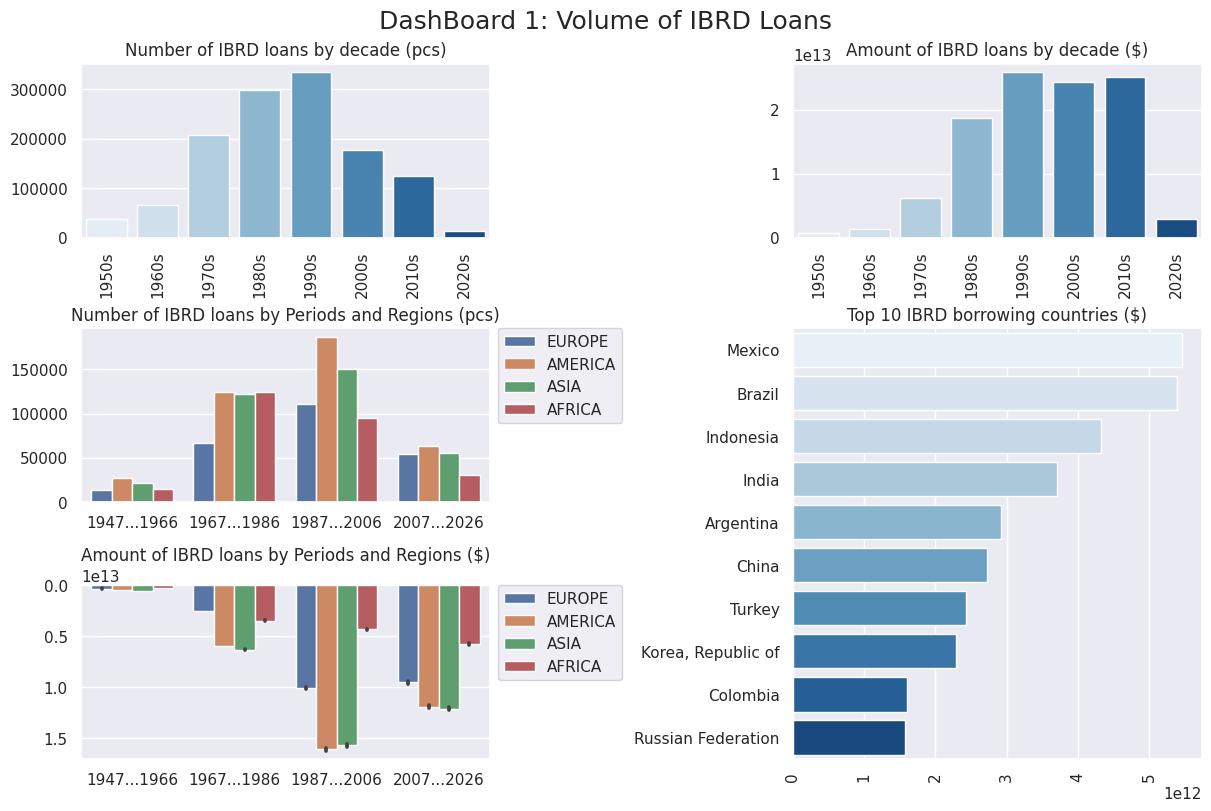

In [574]:
# DashBoard 1: Volume of IBRD Loans

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(layout="constrained")

gs = GridSpec(3, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
# Number of IBRD loans by decade (pcs)
data_decade = df_ibrd.loc[:, ['Decade', 'Period', 'Number of loan deals', 'Original Principal Amount']].groupby(['Decade'], as_index=False).sum()
sns.barplot(x='Decade', y='Number of loan deals', palette='Blues', data=data_decade)
plt.title("Number of IBRD loans by decade (pcs)", fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('', fontsize = 12)
plt.xlabel('', fontsize = 12)

ax3 = fig.add_subplot(gs[0, 1])
sns.barplot(x='Decade', y='Original Principal Amount', palette='Blues', data=data_decade)
plt.xticks(rotation=90)
plt.title("Amount of IBRD loans by decade ($)", fontsize=12)
plt.ylabel('', fontsize = 12)
plt.xlabel('', fontsize = 12)

ax2 = fig.add_subplot(gs[1, 0])
# Number of IBRD loans by Periods and Regions (pcs)
data_prd = df_ibrd.loc[:, ['Period', 'MegaRegion', 'Number of loan deals', 'Original Principal Amount', 'Disbursed Amount', 'Undisbursed Amount']]
sns.barplot(data_prd, x='Period', y='Number of loan deals', hue='MegaRegion', estimator='sum')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.title("Number of IBRD loans by Periods and Regions (pcs)", fontsize=12)
plt.ylabel('', fontsize = 12)
plt.xlabel('', fontsize = 12)

ax4 = fig.add_subplot(gs[2, 0])
# Amount of IBRD loans by Periods and Regions ($)
sns.barplot(data_prd, x='Period', y='Original Principal Amount', hue='MegaRegion', estimator='sum')
plt.title("Amount of IBRD loans by Periods and Regions ($)", fontsize=12)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.gca().invert_yaxis()
plt.ylabel('', fontsize = 12)
plt.xlabel('', fontsize = 12)

ax5 = fig.add_subplot(gs[1:, 1])
# Top 10 IBRD borrowing countries ($)
data = df_ibrd.loc[(df_ibrd['Loan Status'] == 'Fully Repaid') | (df_ibrd['Loan Status'] == 'Repaid'),['Country', 'Number of loan deals', 'Original Principal Amount']].groupby(['Country'], as_index=False).sum()
data_10_country = data.sort_values(by='Original Principal Amount', ascending=False).head(10)
sns.barplot(x='Original Principal Amount', y='Country',  orient='h', palette='Blues',data=data_10_country)
plt.xticks(rotation=90)
plt.title("Top 10 IBRD borrowing countries ($)", fontsize=12)
plt.ylabel('', fontsize = 12)
plt.xlabel('', fontsize = 12)

fig.suptitle("DashBoard 1: Volume of IBRD Loans", fontsize=18)
plt.subplots_adjust(top=0.9)

plt.show()

### DashBoard 2: Interest Rates and Loan Duration

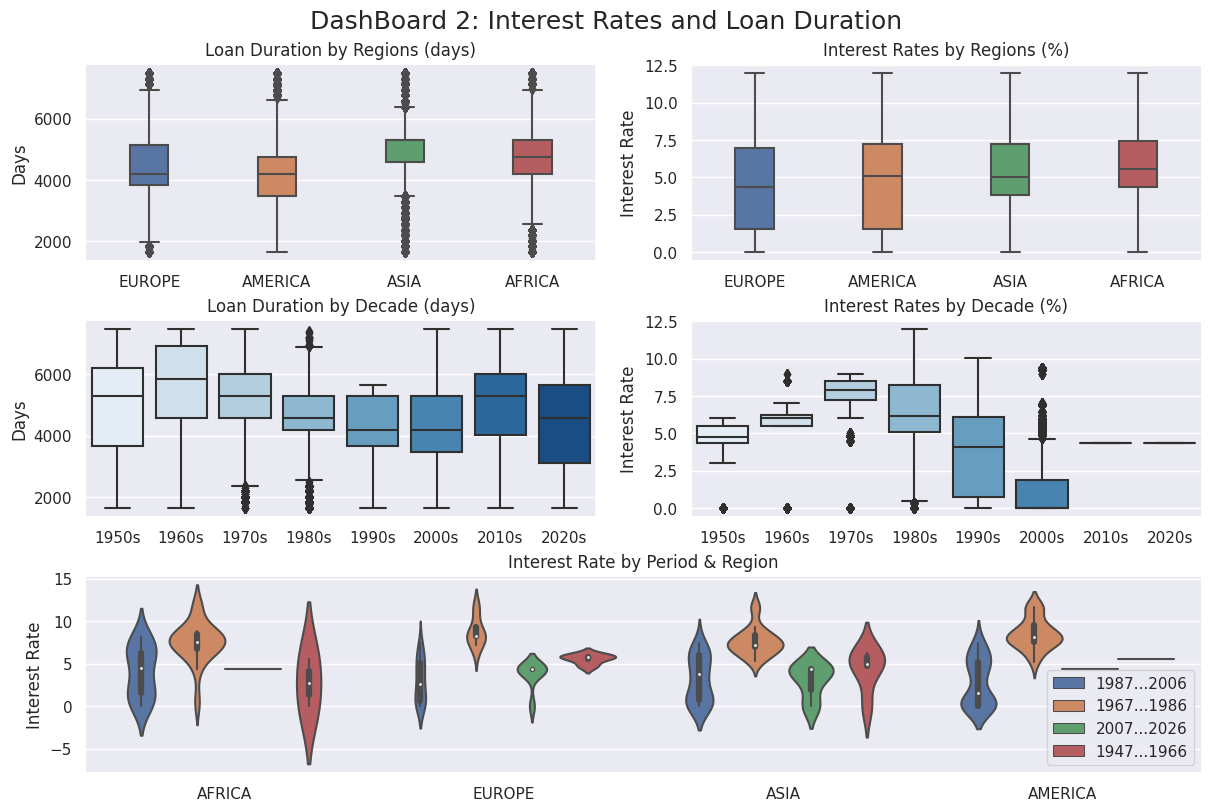

In [575]:
# DashBoard 2: Interest Rates and Loan Duration

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(layout="constrained")

gs = GridSpec(3, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
# Box Plot Loan Duration by MegaRegions: удалим выбросы (используем df_fix)
sns.boxplot( x=df_fix['MegaRegion'], y=df_fix['Days'], width=0.3);
plt.title('Loan Duration by Regions (days)', fontsize=12)
plt.xlabel('', fontsize = 12)

ax2 = fig.add_subplot(gs[0, 1])
# Interest Rates by MegaRegions
rate = df_ibrd.loc[:, ['MegaRegion', 'Interest Rate']]
sns.boxplot( x=rate['MegaRegion'], y=rate['Interest Rate'], width=0.3);
plt.title('Interest Rates by Regions (%)', fontsize=12)
plt.xlabel('', fontsize = 12)

ax3 = fig.add_subplot(gs[1, 0:1])
# Box Plot of Duration by Decade - используем очищенный датафрейм df_fix
sns.boxplot(x=df_fix['Decade'], y=df_fix['Days'], data = df_fix, palette="Blues", notch=False)
plt.title('Loan Duration by Decade (days)', fontsize=12)
plt.xlabel('', fontsize = 12)

ax4 = fig.add_subplot(gs[1, 1])
# Box Plot of Interest Rates by Decade
data = df_ibrd.loc[:,['Decade','Interest Rate']].groupby(['Decade'], as_index=False).mean()
data_year_rate = data.sort_values(by='Decade', ascending=True)
sns.boxplot(x=df_ibrd['Decade'], y=df_ibrd['Interest Rate'], data=data_year_rate, palette="Blues", notch=False)
plt.title('Interest Rates by Decade (%)', fontsize=12)
plt.xlabel('', fontsize = 12)

ax5 = fig.add_subplot(gs[2, :])
# Loan Duration by Period & Region
sns.violinplot(data=df_fix.sample(frac = 0.0002, random_state = 42), x="MegaRegion", y="Interest Rate", hue="Period")
plt.title('Interest Rate by Period & Region', fontsize=12)
ax5.legend(loc='lower right')
plt.xlabel('', fontsize = 12)

g.tight_layout()

fig.suptitle("DashBoard 2: Interest Rates and Loan Duration", fontsize=18)
# plt.subplots_adjust(top=0.9)

plt.show()

### DashBoard 3: Interest Rates and Loan Duration by Regions

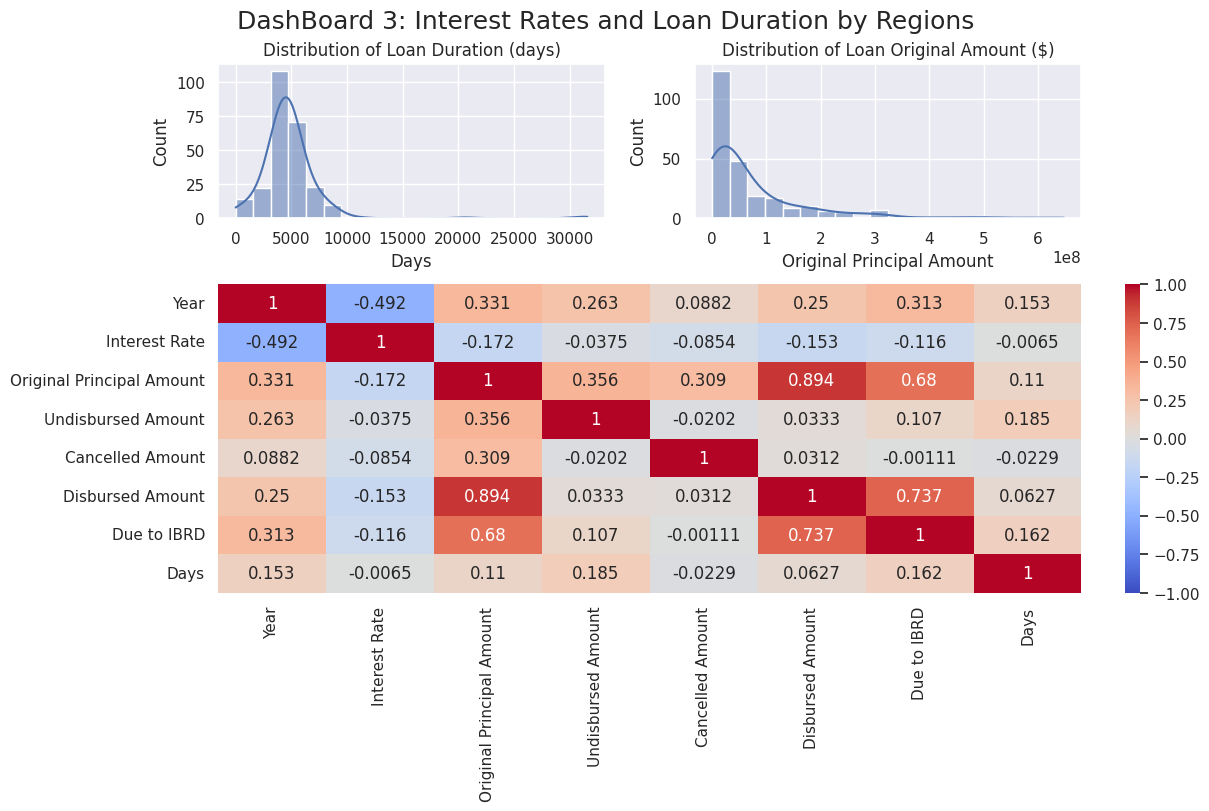

In [576]:
# DashBoard 3: Interest Rates and Loan Duration by Regions

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(layout="constrained")

gs = GridSpec(3, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
# Distribution of Loan Duration (days)
smpl = df_ibrd.sample(frac = 0.0002, random_state = 42)
sns.histplot(data = smpl, x = 'Days', bins = 20, kde = True)
plt.title('Distribution of Loan Duration (days)', fontsize=12)

ax2 = fig.add_subplot(gs[0, 1])
# Distribution of Loan Original Amount ($)
smpl = df_ibrd.sample(frac = 0.0002, random_state = 42)
sns.histplot(data = smpl, x = 'Original Principal Amount', bins = 20, kde = True)
plt.title('Distribution of Loan Original Amount ($)', fontsize=12)

ax3 = fig.add_subplot(gs[1:, 0:])
sns.heatmap(df_ibrd[['Year', 'Interest Rate', 'Original Principal Amount', 'Undisbursed Amount',
                     'Cancelled Amount', 'Disbursed Amount', 'Due to IBRD', 'Days']].corr(),
            cmap= 'coolwarm',
            vmin = -1, vmax = 1,
            annot = True, fmt = '.3g',
            linewidths=0, linecolor='black');

g.tight_layout()
fig.suptitle("DashBoard 3: Interest Rates and Loan Duration by Regions", fontsize=18)
plt.subplots_adjust(top=0.9)

plt.show()